<a href="https://colab.research.google.com/github/BlackPanther3112/Projects/blob/main/Analisis_para_una_empresa_creditica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Celerix Interview Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_excel('BasePRUEBAANALITICA.xlsx')
df.head()


,SOLICITUD,FECHA_INICIO,MULTAS_SIMIT,EDAD,CUOTA_INICIAL,GENERO,ESTADO_CIVIL,NIVEL_ESTUDIO,TIPO_VIVIENDA,PERSONAS_CARGO,...,TIPO_CLIENTE,HABITO_PAGO,ENDEUDAMIENTO,CALIFICACION,CREDITOS_VIGENTES,Puntaje Riesgo,TIPO_CONTRATO,ANTIGUEDAD,Marca producto,Estado
0,1,2017-01-02,0.0,29,0,F,Divorciado,Tecnólogico,Arrendada,2,...,Independiente sin Establecimiento,B,85860.0,A,2,2190,Indefinido,10,Marca A,Aprobada
1,2,2017-01-02,0.0,60,1035000,F,Soltero,Tecnólogico,Arrendada,1,...,Independiente sin Establecimiento,E,1270940.0,C,9,2142,Por Obra o Labor,131,Marca A,Desistida
2,3,2017-01-02,0.0,61,472500,M,Divorciado,Tecnólogico,Arrendada,1,...,Independiente sin Establecimiento,E,664620.0,C,7,2073,Indefinido,63,Marca B,Anulada
3,4,2017-01-02,0.0,25,0,M,Casado,Tecnólogico,Arrendada,2,...,Independiente sin Establecimiento,B,51940.0,A,2,1929,Otra,12,Marca A,Negada
4,5,2017-01-02,0.0,30,3672000,F,Divorciado,Tecnólogico,Arrendada,3,...,Independiente sin Establecimiento,B,0.0,A,2,3,INDEPENDIENTE SIN ESTABLECIMIENTO,131,Marca A,Anulada


In [ ]:
df.shape

(33668, 27)

In [ ]:
df.iloc[0]

,0
SOLICITUD,1
FECHA_INICIO,2017-01-02 00:00:00
MULTAS_SIMIT,0.0
EDAD,29
CUOTA_INICIAL,0
GENERO,F
ESTADO_CIVIL,Divorciado
NIVEL_ESTUDIO,Tecnólogico
TIPO_VIVIENDA,Arrendada
PERSONAS_CARGO,2


In [ ]:
all_midnight = (df["FECHA_INICIO"].dt.time == pd.to_datetime("00:00:00").time()).all()
print("All times are 00:00:00:", all_midnight)

All times are 00:00:00: True


In [ ]:
df["FECHA_INICIO"] = df["FECHA_INICIO"].dt.date

In [ ]:
df.iloc[5]

,5
SOLICITUD,6
FECHA_INICIO,2017-01-02
MULTAS_SIMIT,1147628.5
EDAD,48
CUOTA_INICIAL,1800000
GENERO,F
ESTADO_CIVIL,Divorciado
NIVEL_ESTUDIO,Tecnólogico
TIPO_VIVIENDA,Arrendada
PERSONAS_CARGO,3


Comenterio de descripición de variables

In [ ]:
df.dtypes

,0
SOLICITUD,int64
FECHA_INICIO,object
MULTAS_SIMIT,float64
EDAD,int64
CUOTA_INICIAL,int64
GENERO,object
ESTADO_CIVIL,object
NIVEL_ESTUDIO,object
TIPO_VIVIENDA,object
PERSONAS_CARGO,int64


In [ ]:
df=df.rename(columns={"Puntaje Riesgo":"PUNTAJE_RIESGO", "Marca producto": "MARCA_PRODUCTO", "Estado": "ESTADO"})

In [ ]:
CatCols= ['GENERO','ESTADO_CIVIL','NIVEL_ESTUDIO','TIPO_VIVIENDA','ZONA','CODEUDOR','SUBTIPO_CLIENTE',
            'TIPO_CLIENTE','HABITO_PAGO','CALIFICACION','TIPO_CONTRATO','MARCA_PRODUCTO','ESTADO'] #Cathegorical Columns

for row in CatCols:
    df[row] = df[row].astype('string')
df.dtypes

,0
SOLICITUD,int64
FECHA_INICIO,object
MULTAS_SIMIT,float64
EDAD,int64
CUOTA_INICIAL,int64
GENERO,string[python]
ESTADO_CIVIL,string[python]
NIVEL_ESTUDIO,string[python]
TIPO_VIVIENDA,string[python]
PERSONAS_CARGO,int64


In [ ]:
df.describe()

,SOLICITUD,MULTAS_SIMIT,EDAD,CUOTA_INICIAL,PERSONAS_CARGO,PLAZO,VALOR_SOLICITADO,INGRESOS,EGRESOS,ENDEUDAMIENTO,CREDITOS_VIGENTES,PUNTAJE_RIESGO,ANTIGUEDAD
count,33668.000000,3.366800e+04,33668.000000,3.366800e+04,33668.000000,33668.000000,3.366800e+04,3.366800e+04,3.366800e+04,3.366800e+04,33668.000000,33668.000000,33668.000000
mean,16834.500000,7.647234e+04,34.103956,6.283836e+05,2.042028,36.404360,4.833895e+06,1.768666e+06,7.119266e+05,3.764307e+05,2.421944,1379.838897,39.079066
std,9719.258768,3.007114e+05,16.251590,7.663405e+05,1.010997,8.509071,1.473938e+06,2.215846e+06,1.360024e+06,1.624263e+06,2.571922,907.210098,55.645814
min,1.000000,0.000000e+00,-1.000000,0.000000e+00,1.000000,6.000000,5.250000e+05,0.000000e+00,0.000000e+00,-2.554600e+05,0.000000,0.000000,0.000000
25%,8417.750000,0.000000e+00,26.000000,1.305000e+05,1.000000,36.000000,3.726450e+06,1.041600e+06,3.390000e+05,0.000000e+00,1.000000,21.000000,8.000000
50%,16834.500000,0.000000e+00,31.000000,4.278240e+05,2.000000,36.000000,4.608450e+06,1.344000e+06,5.650000e+05,1.049400e+05,2.000000,1803.000000,19.000000
75%,25251.250000,0.000000e+00,39.000000,7.380000e+05,3.000000,36.000000,5.782875e+06,1.792000e+06,7.684000e+05,3.498000e+05,3.000000,2139.000000,43.000000
max,33668.000000,6.679191e+06,2000.000000,9.900000e+06,29.000000,60.000000,1.363950e+07,1.563520e+08,8.554100e+07,1.425000e+08,89.000000,2742.000000,637.000000


### Looking for Nans, duplicates and problematic values

In [ ]:
def count_string_values(df, column):                             # This function returns the number of repetitions per string value in a column
    value_counts = df[column].value_counts()
    result = "\n".join([f"{val}: {count}" for val, count in value_counts.items()])
    return result

 Using the function in the cathegorical values to check for mispelled words or blank values

In [ ]:

for column in CatCols: print(count_string_values(df, column), "\n")

F: 22165
M: 11503 

Casado: 15239
Divorciado: 13215
Viudo: 4480
Soltero: 628
Unión Libre: 106 

Tecnólogico: 20800
Primaria: 4458
Universitario: 2257
Técnico: 2119
Secundaria: 1817
Universidad: 1057
Especialización: 889
Ninguno: 132
Postgrado: 93
Bachillerato: 46 

Arrendada: 22392
Propia sin hipoteca: 8672
Propia con hipoteca: 2046
Propia: 353
Sin Patrimonio: 157
Familiar: 48 

ZONA SUROCCIDENTE: 11344
ZONA ANTIOQUIA: 5263
ZONA CENTRO: 4339
ZONA COSTA: 3710
ZONA EJE CAFETERO: 3385
ZONA BOGOTA: 3014
ZONA ORIENTE: 2613 

Si: 33168
No: 500 

INFO: 20819
FORM: 12849 

Independiente sin Establecimiento: 27587
Empleado: 3062
Independiente con Establecimiento: 3019 

B: 23073
E: 8545
C: 1208
A: 388
K: 273
D: 181 

A: 27865
C: 4861
B: 347
AA: 191
D: 161
BB: 86
E: 80
K: 67
CC: 7
-: 3 

Por Obra o Labor: 10059
INDEPENDIENTE SIN ESTABLECIMIENTO: 7572
Indefinido: 5210
Otra: 3785
Temporal: 3062
INDEPENDIENTE CON ESTABLECIMIENTO: 3019
Libre Nombramiento: 496
Carrera Administrati: 32
Provisionalidad

In [ ]:
df['CALIFICACION'] = df['CALIFICACION'].astype(str)
df['CALIFICACION'] = df['CALIFICACION'].str.replace('-', 'BB')# BB I calculate as the pecieved mean

Now we look for Nans

In [ ]:
print(df.isna().sum())

SOLICITUD              0
FECHA_INICIO           0
MULTAS_SIMIT           0
EDAD                   0
CUOTA_INICIAL          0
GENERO                 0
ESTADO_CIVIL           0
NIVEL_ESTUDIO          0
TIPO_VIVIENDA          0
PERSONAS_CARGO         0
ZONA                   0
PLAZO                  0
CODEUDOR               0
VALOR_SOLICITADO       0
INGRESOS               0
EGRESOS                0
SUBTIPO_CLIENTE        0
TIPO_CLIENTE           0
HABITO_PAGO            0
ENDEUDAMIENTO          0
CALIFICACION           0
CREDITOS_VIGENTES      0
PUNTAJE_RIESGO         0
TIPO_CONTRATO        377
ANTIGUEDAD             0
MARCA_PRODUCTO         0
ESTADO                 0
dtype: int64


In [ ]:
df.fillna({'TIPO_CONTRATO':'Otra'}, inplace=True) # Reemplazaré los valores en Nan en tipo de contrato con la categoría 'Otra'


In [ ]:
#Now for Nulls

df.isnull().values.any()

np.False_

In [ ]:
#This function checks for duplicated considering all columns except by the ones specified in exclude_columns
def count_duplicates_excluding(df, exclude_columns,bool):
    check_df = df.drop(columns=exclude_columns)
    duplicates = check_df[check_df.duplicated(keep=bool)]
    return len(duplicates), duplicates

In [ ]:
count, dup_rows = count_duplicates_excluding(df, exclude_columns=['SOLICITUD'],bool='first')
print(f"Number of extra duplicated rows (excluding SOLICITUD): {count}")
df_clean = df.drop(dup_rows.index)

Number of extra duplicated rows (excluding SOLICITUD): 148


In [ ]:
count, dup_rows = count_duplicates_excluding(df_clean, exclude_columns=['SOLICITUD','ESTADO'],bool=False)
print(f"Number of total duplicated rows (excluding ESTADO): {count}")
#print(dup_rows)
#summary = dup_rows.groupby(list(dup_rows.columns)).size().reset_index(name='count')
#print(summary)

Number of total duplicated rows (excluding ESTADO): 1224


In [ ]:
counts = df_clean['ESTADO'].value_counts()
print(counts)

ESTADO
Desistida    12265
Negada       10310
Aprobada      6939
Anulada       4006
Name: count, dtype: Int64


In [ ]:
NoAnulada_Columns= (
    df_clean.loc[dup_rows.index].groupby(list(dup_rows.columns))
       .apply(lambda g: pd.Series({'Number_of_Not_Anulada': (g['ESTADO'] != 'Anulada').sum()}))
) #columnas con resultado diferente a anulada por grupo de filas duplicadas excluyendo solicitud y estado

#NoAnulada_Columns= (
#    df_clean.loc[dup_rows.index].groupby(list(dup_rows.columns))
#       .count()
#)

count_IV=(NoAnulada_Columns['Number_of_Not_Anulada'].ne(1)).sum() # Cuenta el número de grupos inconsistentetes (Inconsistent Values(IV)) (es decir columnas que estén ej aprobadas y Negadas o aprobadas y desistidas al mismo tiempo)
print(count_IV)
print(NoAnulada_Columns.shape)


0
(612, 1)


<ipython-input-22-a8754f089faf>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({'Number_of_Not_Anulada': (g['ESTADO'] != 'Anulada').sum()}))


In [ ]:
Anulada_dup=(df_clean.loc[dup_rows.index])['ESTADO'].eq('Anulada')
Anulada_dup=dup_rows[Anulada_dup]
df_clean = df_clean.drop(Anulada_dup.index)

In [ ]:
numCols=['MULTAS_SIMIT', 'EDAD', 'CUOTA_INICIAL', 'PERSONAS_CARGO', 'PLAZO',
       'VALOR_SOLICITADO', 'INGRESOS', 'EGRESOS', 'ENDEUDAMIENTO', 'CREDITOS_VIGENTES',
       'PUNTAJE_RIESGO','ANTIGUEDAD']

Ahora buscamos outliers y analizamos cuáles pueden ser inconvenientes para futuras estadísticas

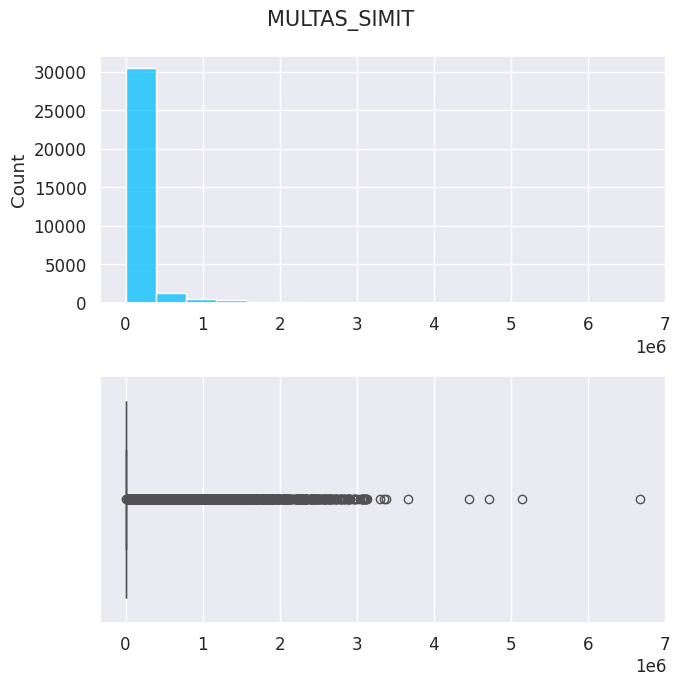

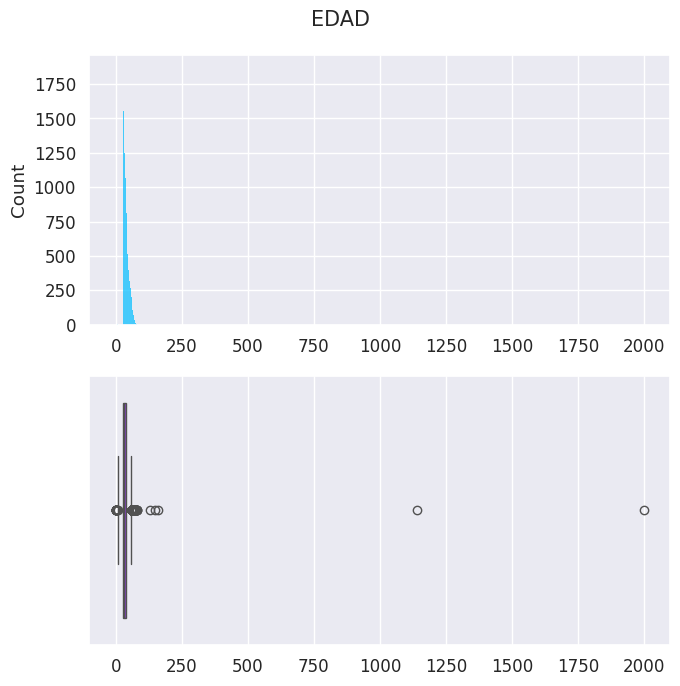

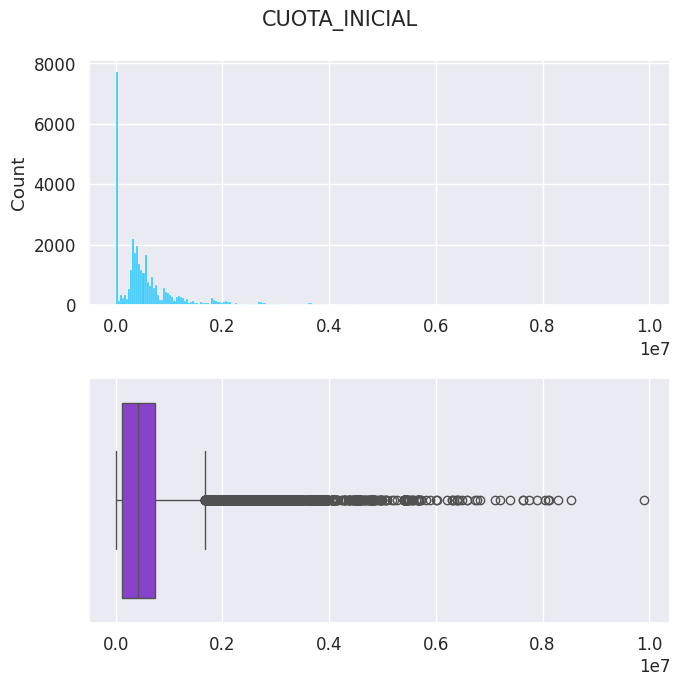

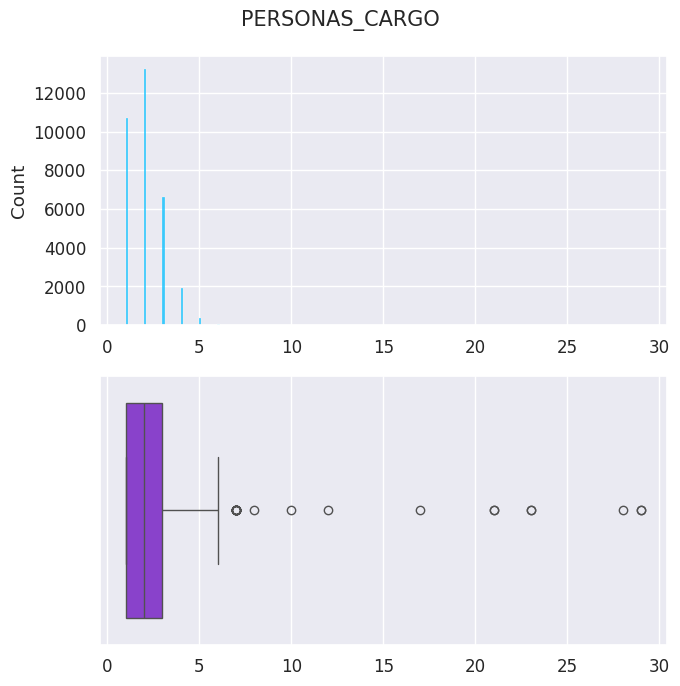

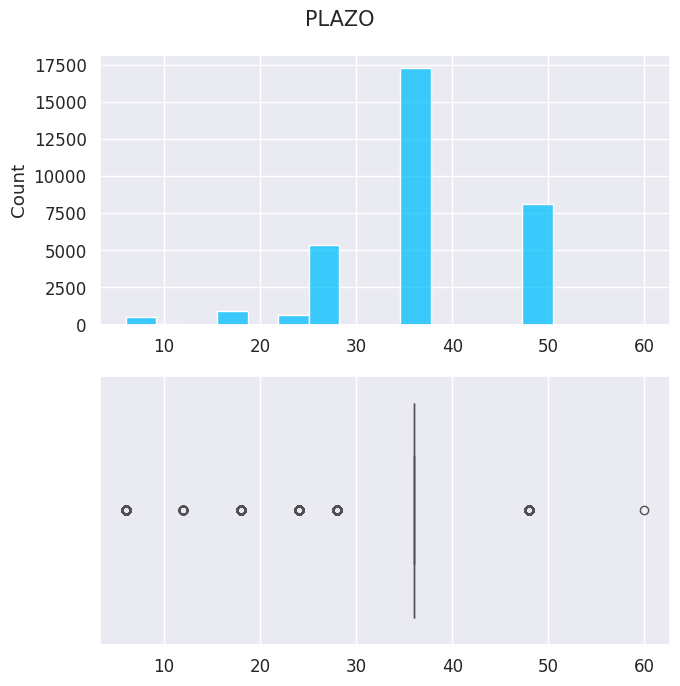

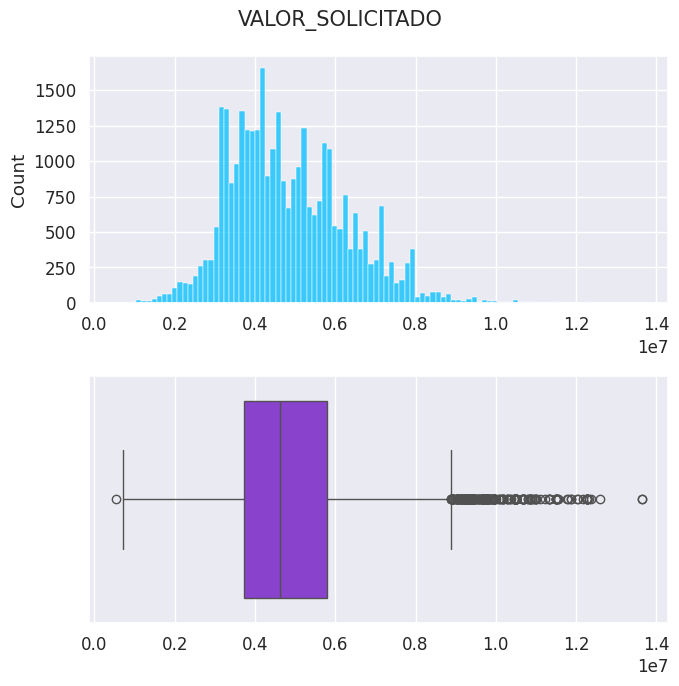

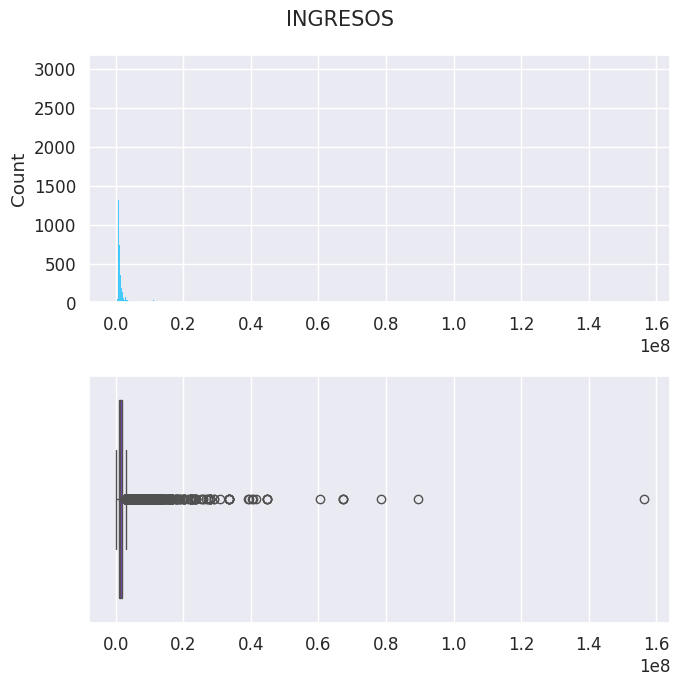

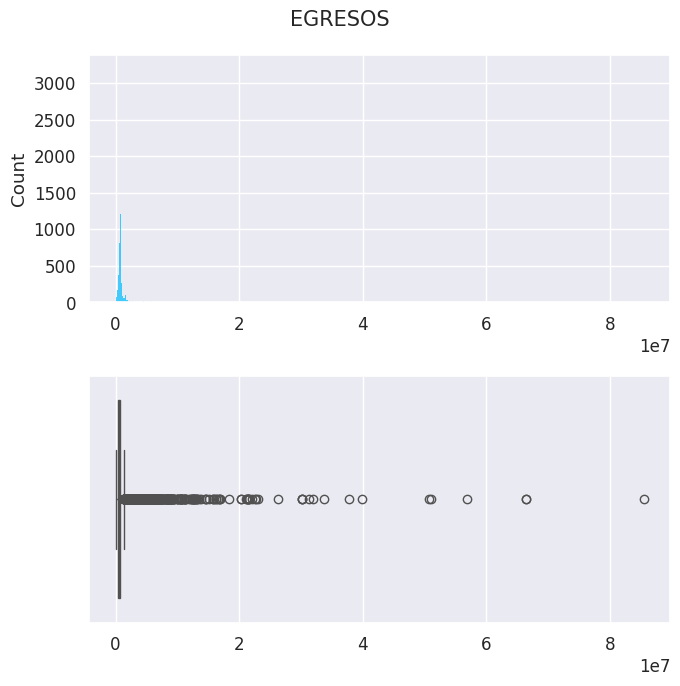

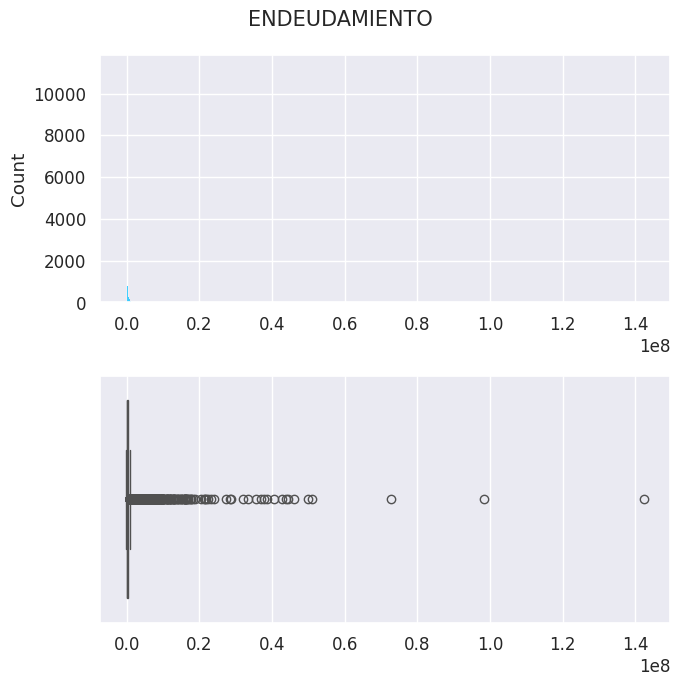

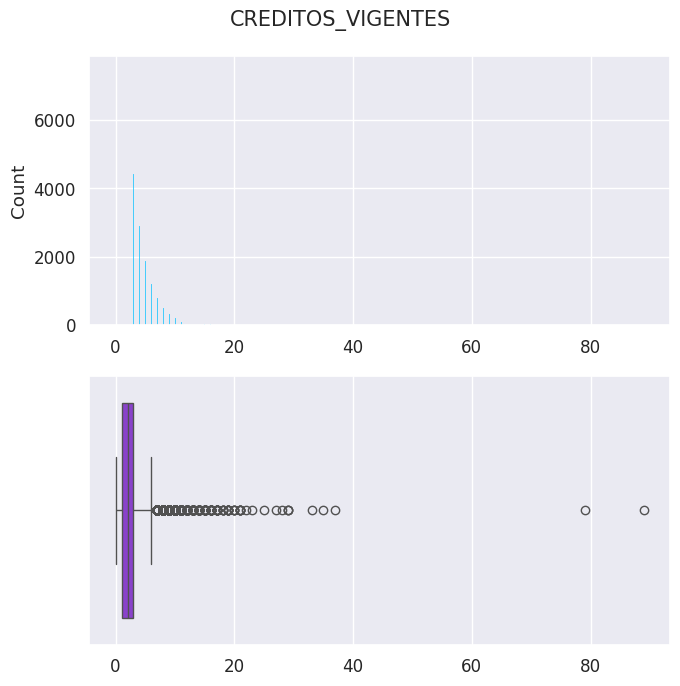

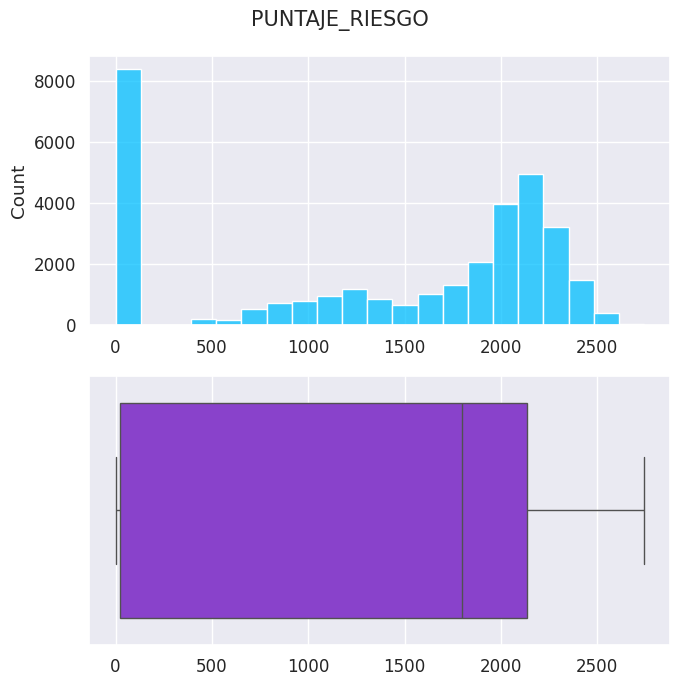

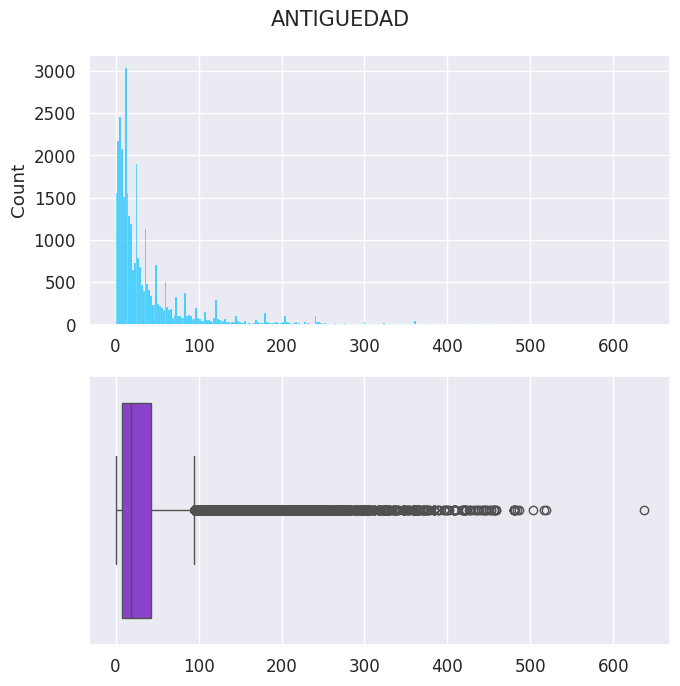

In [ ]:
sns.set_theme(font_scale=1.1)
for col in numCols:
    fig,ax = plt.subplots(2,1,figsize=(7,7),tight_layout=True)
    fig.suptitle(col,size=15)
    sns.histplot(x=df_clean[col],ax=ax[0],color='deepskyblue')
    sns.boxplot(x=df_clean[col],ax=ax[1],color='blueviolet')
    ax[0].set_xlabel("")
    ax[1].set_xlabel("")
    plt.show()

In [ ]:
def Outliers(column):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)]
    return outliers

In [ ]:
out_MS=Outliers('MULTAS_SIMIT')
print(out_MS['MULTAS_SIMIT'].max(),'\n', out_MS['MULTAS_SIMIT'].min())

6679191.45 
 697.64


In [ ]:
#Para edad descartamos los valores menores a 18 y mayores a 100
df_clean = df_clean[(df_clean['EDAD'] >= 18) & (df_clean['EDAD'] <= 100)]

In [ ]:
out_MS=Outliers('CUOTA_INICIAL')
print(df_clean['CUOTA_INICIAL'].max(),'\n', df_clean['CUOTA_INICIAL'].min())
#El rango de cuota iniciial tiene sentido, lo que no tendría sentido es que la cuota inicial fuera mayor al valor solicitado, por lo que se eliminarán los casos donde la cuota inicial sea mayor al valor solicitado.
df_clean = df_clean[df_clean['CUOTA_INICIAL'] <= df_clean['VALOR_SOLICITADO']]

9900000 
 0


In [ ]:
print('PLAZO:', df_clean['PLAZO'].max(),'\n', df_clean['PLAZO'].min())
print('VALOR_SOLICITADO:', df_clean['VALOR_SOLICITADO'].max(),'\n', df_clean['VALOR_SOLICITADO'].min())
print('INGRESOS:', df_clean['INGRESOS'].max(),'\n', df_clean['INGRESOS'].min())
print('EGRESOS:', df_clean['EGRESOS'].max(),'\n', df_clean['EGRESOS'].min())

PLAZO: 60 
 6
VALOR_SOLICITADO: 13639500.0 
 1025286.15
INGRESOS: 156352000.0 
 0.0
EGRESOS: 85540999.99999999 
 0.0


In [ ]:
#También considero que la cantidad de creditos activos sea mayor a 30, para un particular o empresa pequeña-mediana, por lo que se eliminarán los casos donde la cantidad de creditos activos sea mayor a 30.
df_clean = df_clean[df_clean['CREDITOS_VIGENTES'] <= 30]

In [ ]:
print('Fecha:',df_clean['FECHA_INICIO'].max()   , df_clean['FECHA_INICIO'].min() )
#El rango de las fechas es justo el esperado, por lo que no se eliminarán casos por este motivo.

Fecha: 2017-12-31 2017-01-02


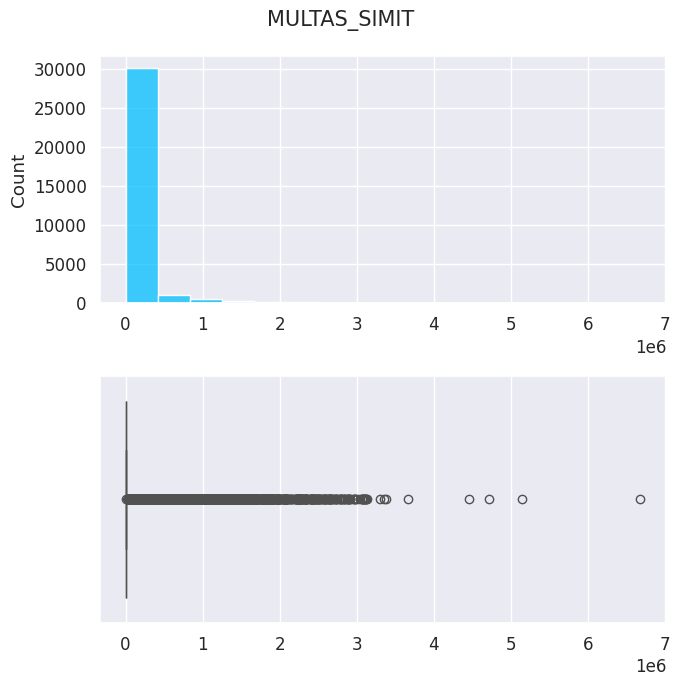

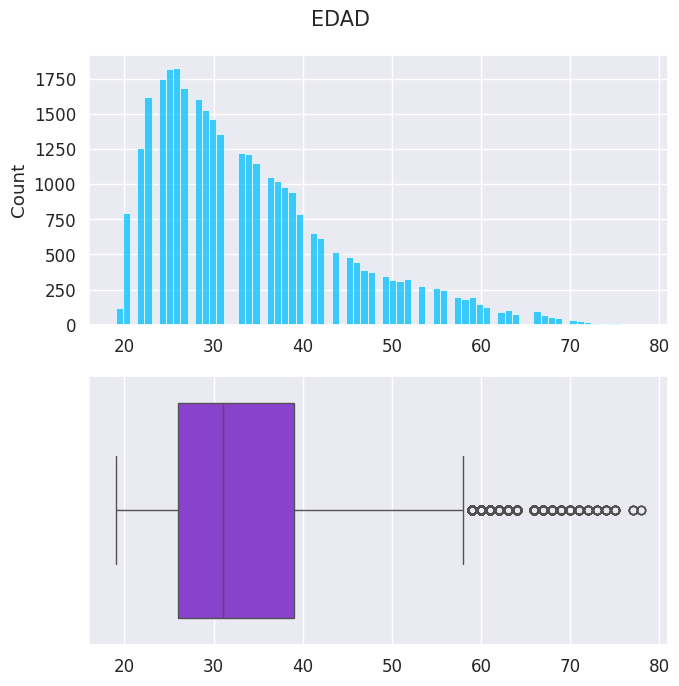

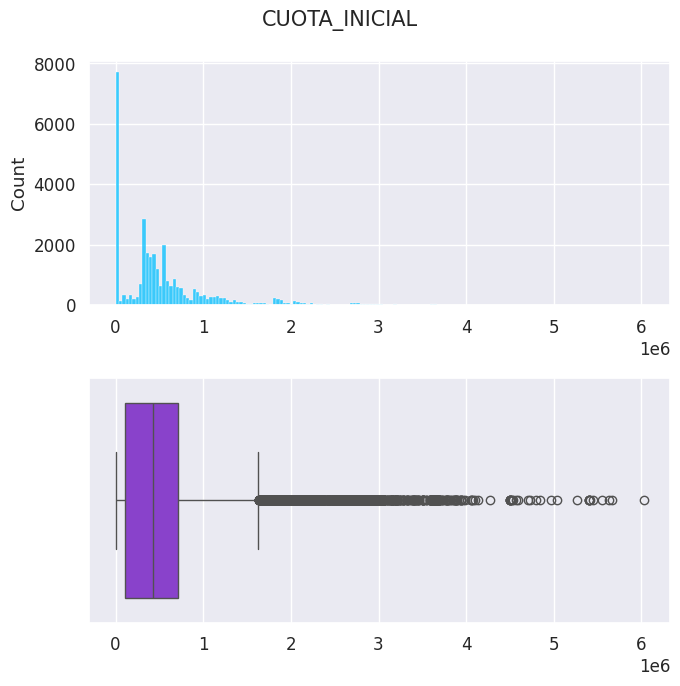

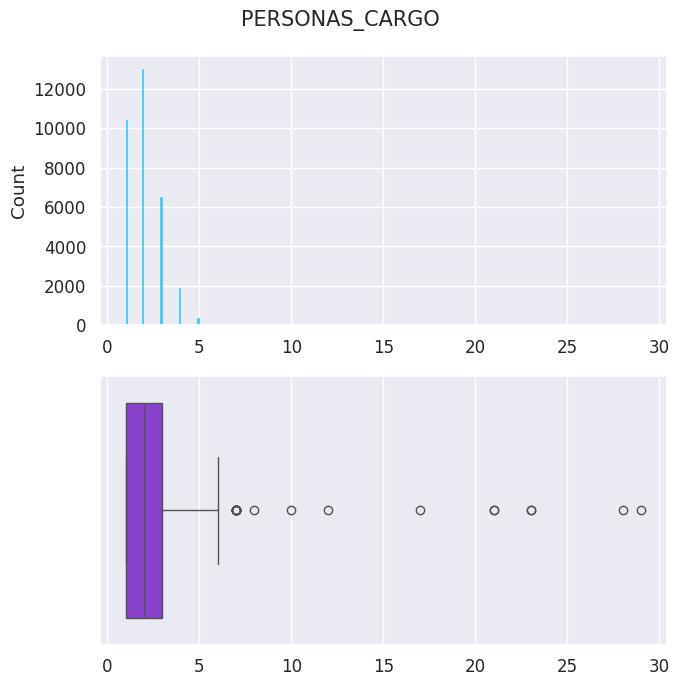

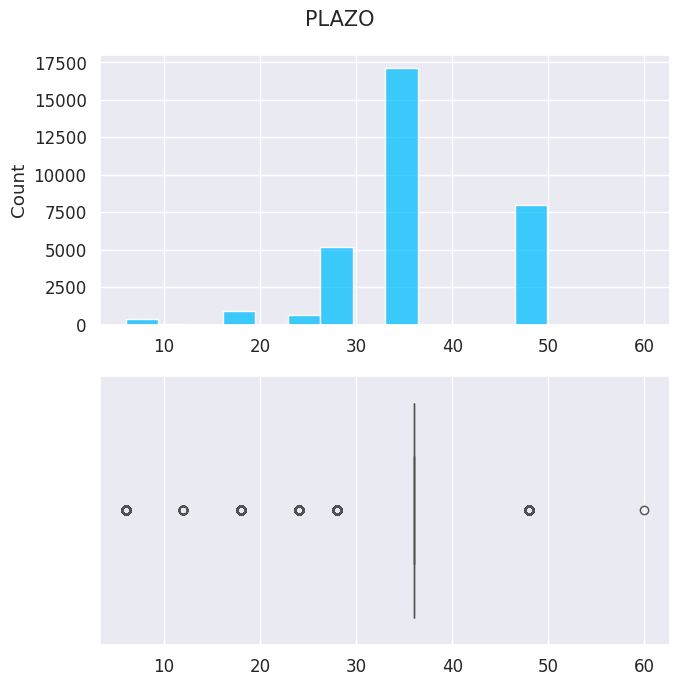

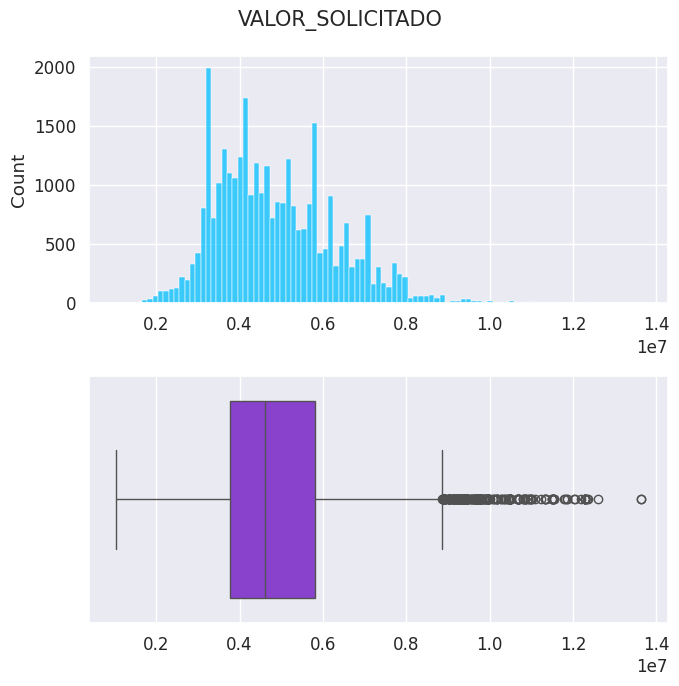

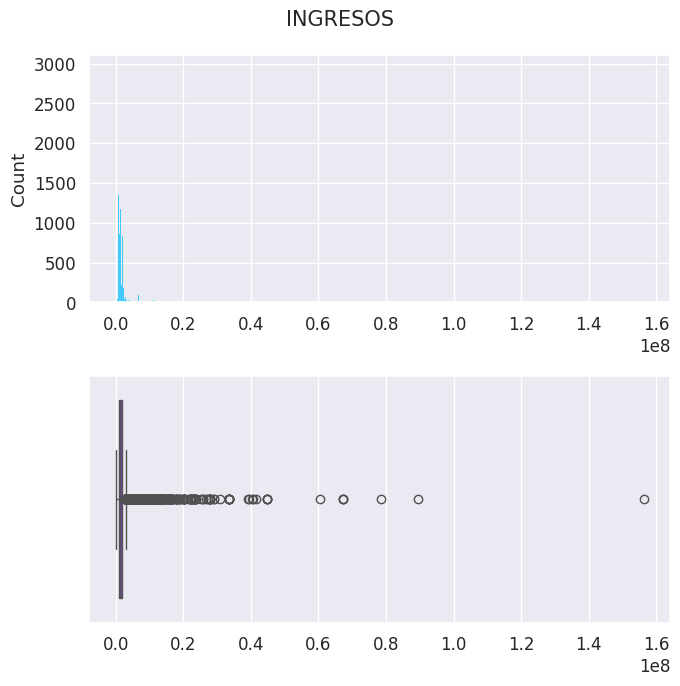

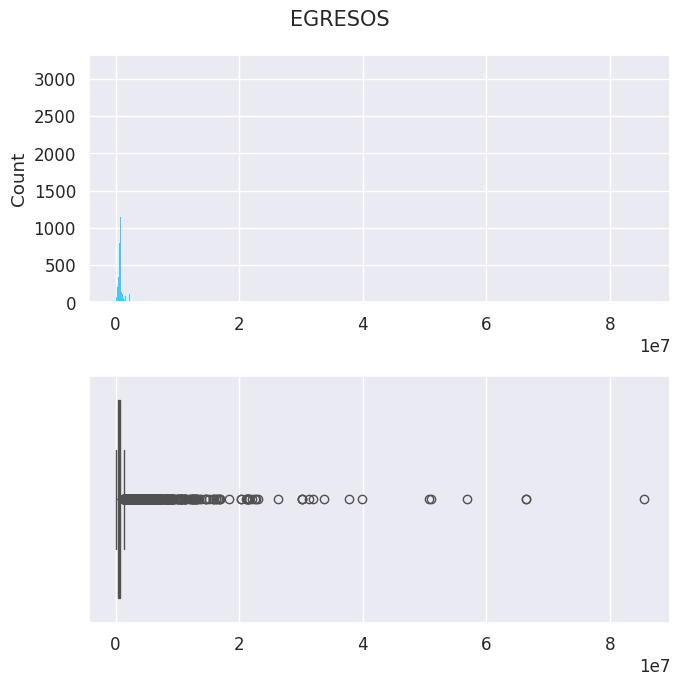

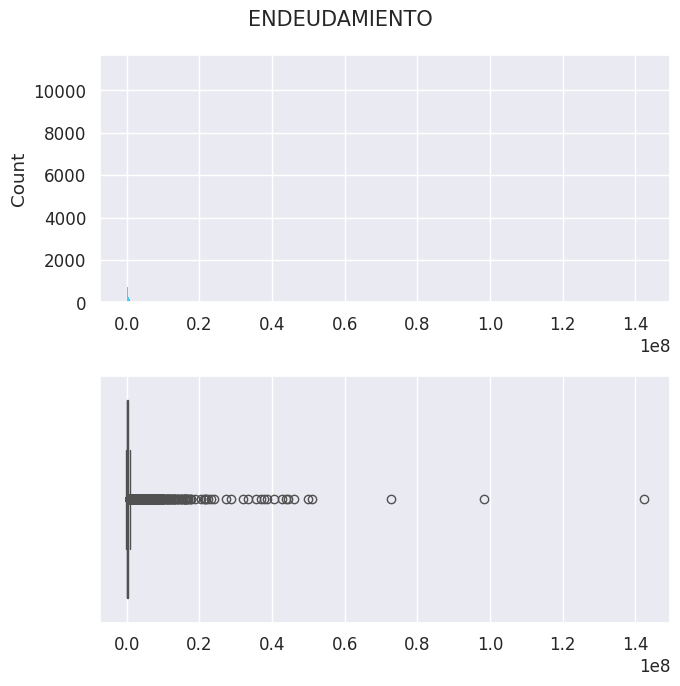

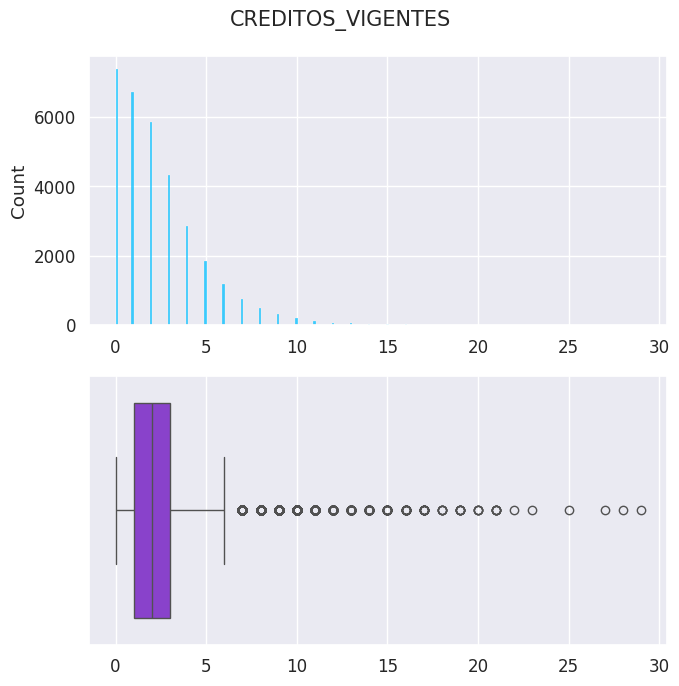

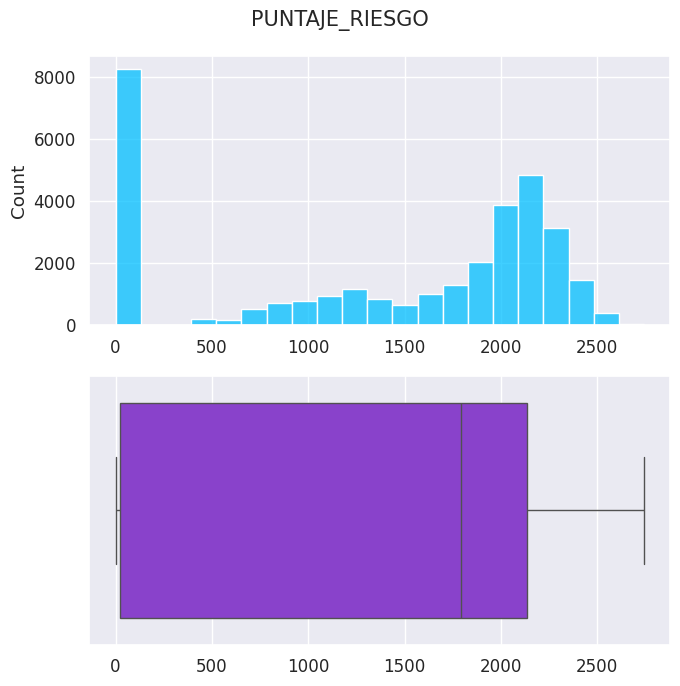

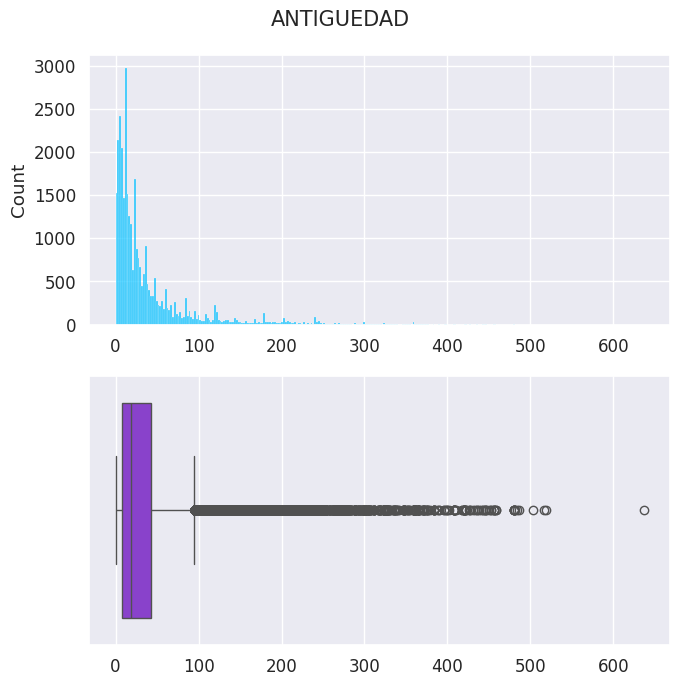

In [ ]:
for col in numCols:
    fig,ax = plt.subplots(2,1,figsize=(7,7),tight_layout=True)
    fig.suptitle(col,size=15)
    sns.histplot(x=df_clean[col],ax=ax[0],color='deepskyblue')
    sns.boxplot(x=df_clean[col],ax=ax[1],color='blueviolet')
    ax[0].set_xlabel("")
    ax[1].set_xlabel("")
    plt.show()

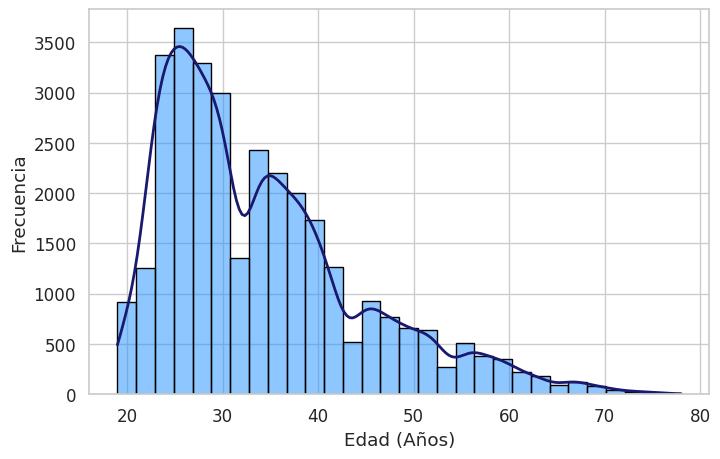

In [ ]:

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

ax=sns.histplot(
x=df_clean['EDAD'],
bins=30,
kde=True,
color='dodgerblue', # color of the bars
edgecolor='black', # bar borders
element='bars'     # ensures bars are touching
)

ax.lines[0].set_color('midnightblue')  # color of the KDE line
ax.lines[0].set_linewidth(2)  # width of the KDE line

#plt.title('ED')
plt.xlabel('Edad (Años)')
plt.ylabel('Frecuencia')
plt.show()


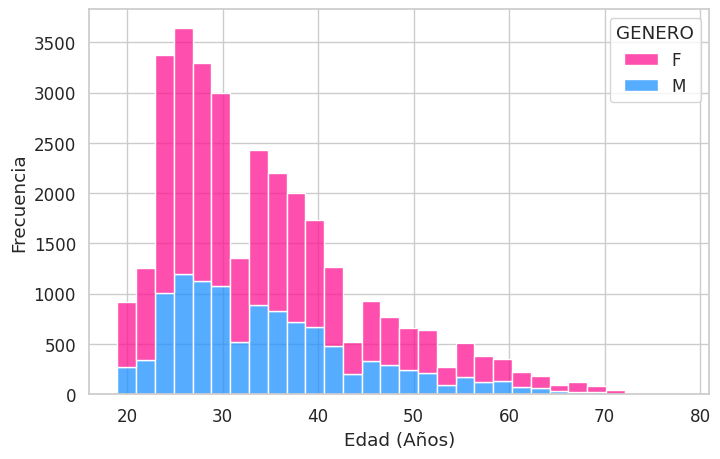

In [ ]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

sns.histplot(data=df_clean, x='EDAD', hue='GENERO', multiple='stack',bins=30,palette=['deeppink','dodgerblue'])

plt.xlabel('Edad (Años)')
plt.ylabel('Frecuencia')
plt.show()
plt.show()

<Figure size 1200x800 with 0 Axes>

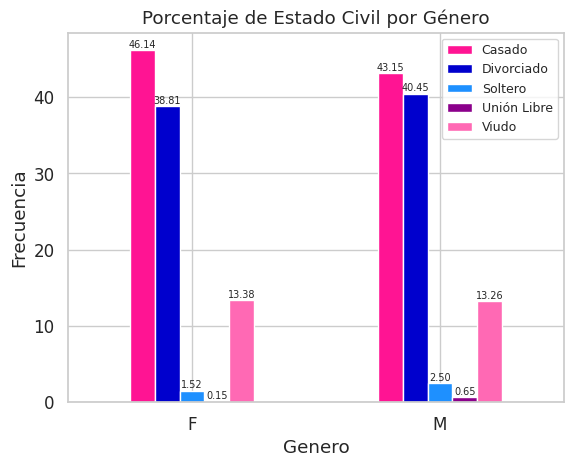

In [ ]:
plt.figure(figsize=(12, 8))
csc=df_clean.groupby(['GENERO','ESTADO_CIVIL']).size().unstack(fill_value=0)
percentages = csc.divide(csc.sum(axis=1), axis=0) * 100
ax=percentages.plot.bar(color=['deeppink','mediumblue','dodgerblue','darkmagenta','hotpink'],rot=0)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%.2f',padding=0.5,fontsize=7)

plt.legend( loc='upper right',fontsize=9)
plt.title('Porcentaje de Estado Civil por Género')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
df_clean['NIVEL_ESTUDIO'] = df_clean['NIVEL_ESTUDIO'].astype(str)
df_clean['NIVEL_ESTUDIO'] = df_clean['NIVEL_ESTUDIO'].str.replace('Universitario', 'Universidad')
df_clean['NIVEL_ESTUDIO'] = df_clean['NIVEL_ESTUDIO'].str.replace('Bachillerato', 'Secundaria')
cat_ed=['Ninguno', 'Primaria', 'Secundaria','Técnico', 'Tecnólogico',  'Universidad', 'Especialización',  'Postgrado']
df_clean['NIVEL_ESTUDIO'] = pd.Categorical(df_clean['NIVEL_ESTUDIO'], categories=cat_ed, ordered=True)


<ipython-input-38-085dcc42b043>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nei=df_clean.groupby('NIVEL_ESTUDIO')['INGRESOS'].mean() #INGRESOS PROMEDIO POR NIVEL_DE ESTUDIOS


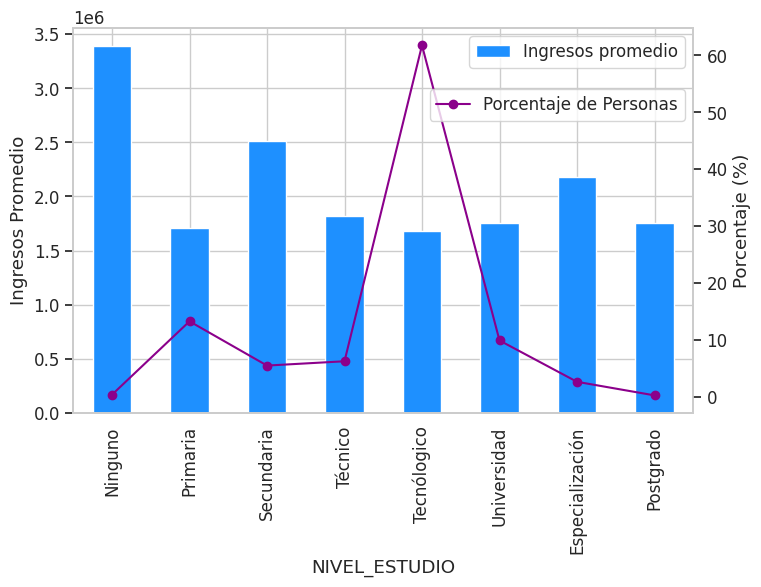

In [ ]:
nei=df_clean.groupby('NIVEL_ESTUDIO')['INGRESOS'].mean() #INGRESOS PROMEDIO POR NIVEL_DE ESTUDIOS
education_level_counts = df_clean['NIVEL_ESTUDIO'].value_counts(sort=False)
total_count = df_clean.shape[0]
education_level_percentages = (education_level_counts / total_count) * 100

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

# Plot the average income on the primary y-axis
ax1 = nei.plot.bar( color='dodgerblue', label='Ingresos promedio')
ax1.set_ylabel('Ingresos Promedio')
ax1.tick_params(axis='y')
ax1.legend(loc='upper right')

ax2 = ax1.twinx()

# Plot the percentage of people per education level on secundary axis
ax2 = education_level_percentages.plot(style='o-', label='Porcentaje de Personas', color='darkmagenta')
ax2.grid(False)
ax2.set_ylabel('Porcentaje (%)')
ax2.tick_params(axis='y')
ax2.legend(loc='center right', bbox_to_anchor=(1, 0.8))

# Create a secondary y-axis


# Plot the average income on the secondary y-axis

#plt.title('Porcentaje de Personas e Ingresos Promedio por Nivel de Estudio')
plt.xlabel('Nivel de Estudio')
plt.show()


In [ ]:
nei

,INGRESOS
NIVEL_ESTUDIO,
Ninguno,3.388671e+06
Primaria,1.711993e+06
Secundaria,2.513364e+06
Técnico,1.823253e+06
Tecnólogico,1.678604e+06
Universidad,1.753515e+06
Especialización,2.179525e+06
Postgrado,1.758145e+06


In [ ]:
education_level_counts

,count
NIVEL_ESTUDIO,
Ninguno,126
Primaria,4285
Secundaria,1777
Técnico,2021
Tecnólogico,19931
Universidad,3199
Especialización,856
Postgrado,87


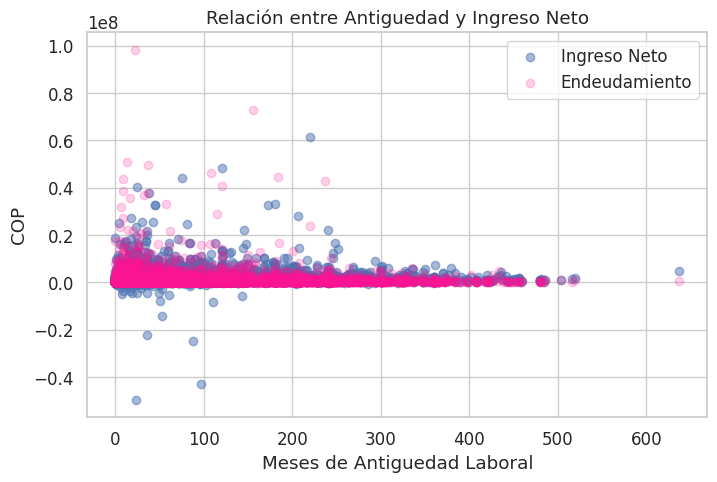

In [ ]:
# Calculate the net income and add it as a new column
ingreso_neto = df_clean['INGRESOS'] - df_clean['EGRESOS']
df_clean['INGRESO_NETO'] = ingreso_neto

# Filter out rows where 'ANTIGUEDAD' is equal to its maximum value
ant = df_clean[(df_clean['INGRESO_NETO'] != df_clean['INGRESO_NETO'].max()) & (df_clean['ENDEUDAMIENTO'] != df_clean['ENDEUDAMIENTO'].max())]

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
plt.scatter(ant['ANTIGUEDAD'], ant['INGRESO_NETO'], alpha=0.5, label='Ingreso Neto')
plt.scatter(ant['ANTIGUEDAD'],ant['ENDEUDAMIENTO'], label='Endeudamiento',alpha=0.2,color='deeppink')
plt.legend()
plt.xlabel('Meses de Antiguedad Laboral')
plt.ylabel('COP')
plt.title('Relación entre Antiguedad y Ingreso Neto')
plt.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
counts_subtip=df_clean.groupby(['TIPO_CONTRATO', 'SUBTIPO_CLIENTE']).size().unstack(fill_value=0)
total_st = counts_subtip.sum(axis=1)
total_st

,0
TIPO_CONTRATO,
Carrera Administrati,31
INDEPENDIENTE CON ESTABLECIMIENTO,2900
INDEPENDIENTE SIN ESTABLECIMIENTO,7262
Indefinido,4986
Libre Nombramiento,483
Otra,3992
Por Obra o Labor,9638
Propiedad,23
Provisionalidad,25


In [ ]:
sizet = [31, 2900, 7262, 4986, 483, 3992, 9638, 23, 25, 2935, 7]  # Example values

# Correct sizeref calculation
sizeref = 0.18 * max(sizet) / (40. ** 2)

# Create a Plotly figure
fig = go.Figure(data=[go.Scatter(
    x=[2.6, 3, 3, 4, 5, 5, 6, 7, 8, 7,8.5],
    y=[11, 12, 10, 11, 12, 10, 12, 13, 12, 11, 10],
    mode='markers',
    marker=dict(
        size=sizet,
        sizemode='area',
        sizeref=sizeref,
        sizemin=5
    )
)])

fig.show()

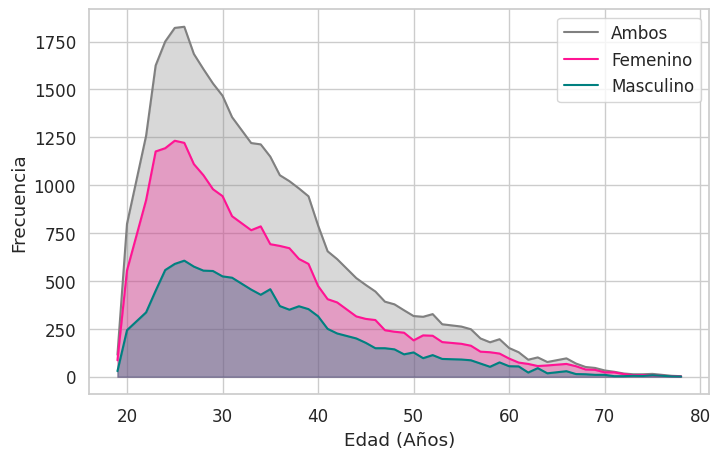

In [ ]:
gender_age_counts = df_clean.groupby(['EDAD', 'GENERO']).size().unstack(fill_value=0)

men_age_counts = gender_age_counts['M']
women_age_counts = gender_age_counts['F']
total_counts = gender_age_counts.sum(axis=1)

plt.figure(figsize=(8, 5))

sns.set_style("whitegrid")


plt.plot(men_age_counts.index, total_counts, label='Ambos',color='gray')
plt.fill_between(men_age_counts.index, 0, total_counts, color='gray',alpha=0.3)
plt.xlabel('Edad (Años)')
plt.ylabel('Frecuencia')
plt.legend()

plt.plot(women_age_counts.index, women_age_counts.values, label='Femenino', color='deeppink',)
plt.fill_between(women_age_counts.index, 0 ,women_age_counts.values, color='deeppink',alpha=0.3)
plt.xlabel('Edad (Años)')
#plt.title('Cantidad de Mujeres por Edad')
plt.legend()

plt.plot(men_age_counts.index, men_age_counts.values, label='Masculino',color='teal')
plt.fill_between(men_age_counts.index, 0, men_age_counts.values, color='teal',alpha=0.3)
plt.xlabel('Edad (Años)')
plt.ylabel('Frecuencia')
#plt.title('Cantidad de Hombres por Edad')
plt.legend()


plt.show()

In [ ]:
df_clean['ZONA'].value_counts()

,count
ZONA,
ZONA SUROCCIDENTE,10741
ZONA ANTIOQUIA,5119
ZONA CENTRO,4161
ZONA COSTA,3627
ZONA EJE CAFETERO,3184
ZONA BOGOTA,2929
ZONA ORIENTE,2521


<ipython-input-47-9007830c5178>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




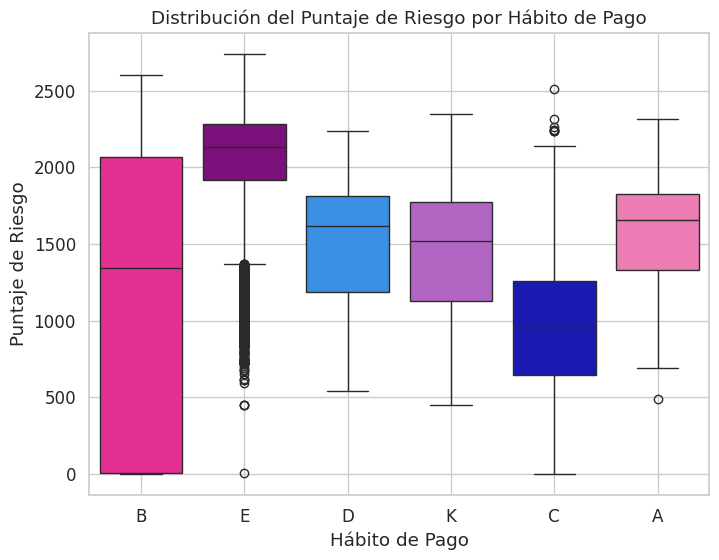

In [ ]:
df_PRHB = df_clean[['PUNTAJE_RIESGO', 'HABITO_PAGO']].dropna()

# Crear boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_PRHB, x='HABITO_PAGO', y='PUNTAJE_RIESGO', palette=['deeppink','darkmagenta', 'dodgerblue','mediumorchid','mediumblue','hotpink'])



# Estética
plt.title('Distribución del Puntaje de Riesgo por Hábito de Pago')
plt.xlabel('Hábito de Pago')
plt.ylabel('Puntaje de Riesgo')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.colors as mcolors # Import colors module with an alias
import matplotlib.cm as cm

In [ ]:
from pandas.api.types import CategoricalDtype

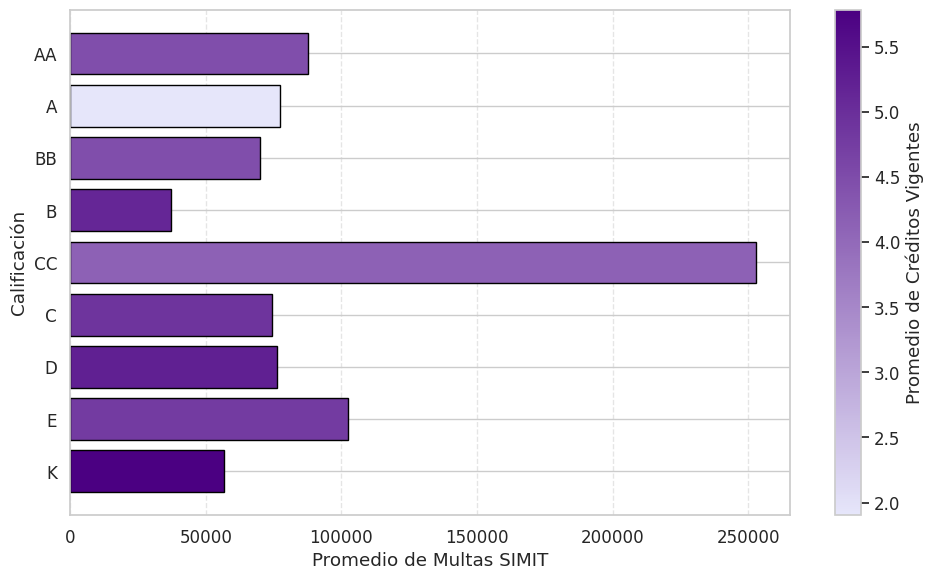

In [ ]:
# Asegúrate de que no haya valores nulos en las columnas relevantes
df_CALMULCRE = df_clean[['CALIFICACION', 'MULTAS_SIMIT', 'CREDITOS_VIGENTES']].dropna()

# Agrupar por CALIFICACION
grouped = df_CALMULCRE.groupby('CALIFICACION').agg({
    'MULTAS_SIMIT': 'mean',
    'CREDITOS_VIGENTES': 'mean'
}).reset_index()

# Define the desired order for the 'CALIFICACION' column
calificacion_order = ['AA','A','BB','B','CC','C','D','E','K']

# Ordenar por la columna 'CALIFICACION' using a categorical key for custom order
grouped['CALIFICACION'] = pd.Categorical(grouped['CALIFICACION'], categories=calificacion_order, ordered=True)
grouped.sort_values('CALIFICACION', inplace=True,ascending=False)


# Define the colors for the colormap (from light blue to dark purple)
# You can use color names, hex codes, or RGB tuples
colors = ['#E6E6FA', "indigo"] # Or specify more intermediate colors for finer control

# Create a LinearSegmentedColormap from the defined colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list("light_blue_to_dark_purple", colors)

# Crear normalizador y mapa de color
# Use the imported mcolors.Normalize
norm = mcolors.Normalize(grouped['CREDITOS_VIGENTES'].min(), grouped['CREDITOS_VIGENTES'].max())
# Use your custom colormap
cmap = custom_cmap
bar_colors_array = cmap(norm(grouped['CREDITOS_VIGENTES']))

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Dibujar barras horizontales
bars = ax.barh(grouped['CALIFICACION'], grouped['MULTAS_SIMIT'], color=bar_colors_array, edgecolor='black')

# Agregar barra de color (colorbar)
# Use the imported cm.ScalarMappable
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # necesario aunque no se use directamente
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Promedio de Créditos Vigentes')

# Etiquetas y estética
ax.set_xlabel('Promedio de Multas SIMIT')
ax.set_ylabel('Calificación')
#ax.set_title('Promedio de Multas SIMIT por Calificación\n(Color según Créditos Vigentes Promedio)')
ax.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

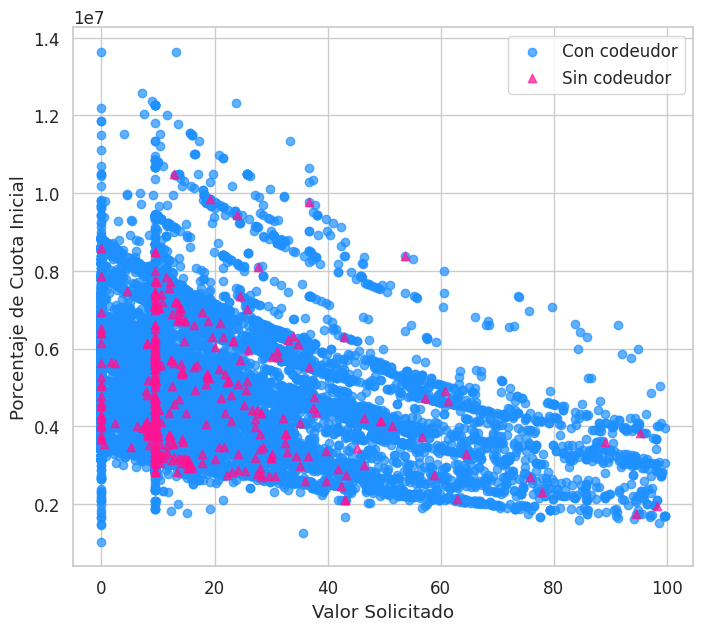

In [ ]:
# Calculate the net income and add it as a new column
PORCENTAJE_CUOTA_INICIAL = (df_clean['CUOTA_INICIAL'] / df_clean['VALOR_SOLICITADO']) * 100
df_clean['PORCENTAJE_CUOTA_INICIAL'] = PORCENTAJE_CUOTA_INICIAL

# Filter the DataFrame for rows where 'CODEUDOR' is 'si'
df_psi = df_clean[df_clean['CODEUDOR'] == 'Si'].copy()

# Filter out rows where 'ANTIGUEDAD' is equal to its maximum value

df_pno= df_clean[df_clean['CODEUDOR'] == 'No'].copy()

plt.figure(figsize=(8, 7))
sns.set_style("whitegrid")
plt.scatter(df_psi['PORCENTAJE_CUOTA_INICIAL'],df_psi['VALOR_SOLICITADO'],  alpha=0.7,color='dodgerblue', label='Con codeudor')
plt.scatter(df_pno['PORCENTAJE_CUOTA_INICIAL'], df_pno['VALOR_SOLICITADO'],  alpha=0.7,color='deeppink',marker='^', label='Sin codeudor')
plt.legend()
plt.xlabel('Valor Solicitado')
plt.ylabel('Porcentaje de Cuota Inicial')
#plt.title('Relación entre Valor Solicitado y Porcentaje de Cuota Inicial')
plt.show()

<ipython-input-52-f81ac24c6efe>:5: UserWarning:

'color' and 'colormap' cannot be used simultaneously. Using 'color'

<ipython-input-52-f81ac24c6efe>:5: UserWarning:

'color' and 'colormap' cannot be used simultaneously. Using 'color'



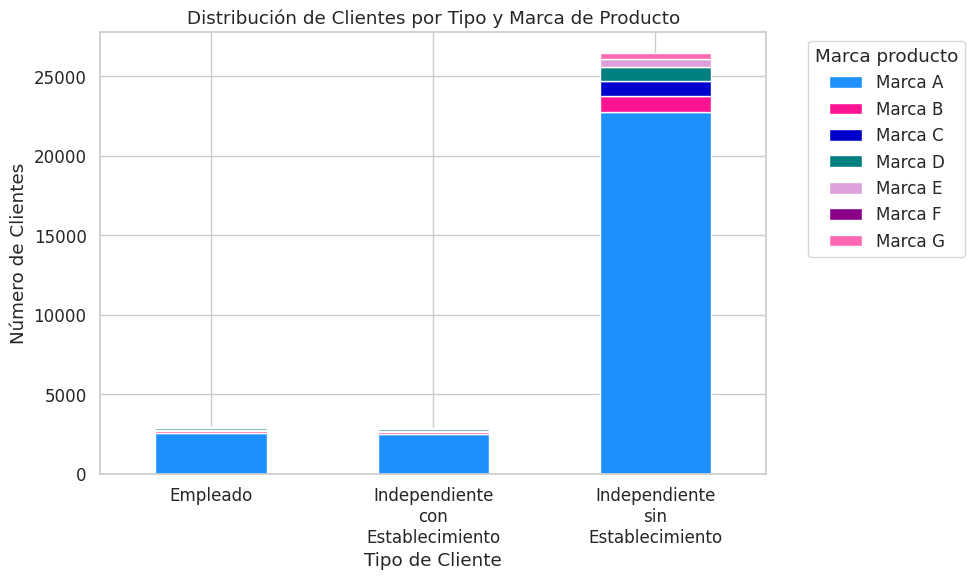

In [ ]:
# Crear tabla cruzada (conteo de combinaciones)
cross_tab = pd.crosstab(df_clean['TIPO_CLIENTE'], df_clean['MARCA_PRODUCTO'])

# Plot
ax=cross_tab.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20',color=['dodgerblue','deeppink','mediumblue','teal','plum','darkmagenta','hotpink'])
labels = [label.get_text() for label in ax.get_xticklabels()]

# Insert line breaks
new_labels = [label.replace(' ', '\n') for label in labels]

# Apply new labels
ax.set_xticklabels(new_labels, rotation=0)
plt.title('Distribución de Clientes por Tipo y Marca de Producto')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Número de Clientes')
plt.legend(title='Marca producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
def analizar_cambio_tiempo(df_clean, columna, fecha='FECHA_INICIO', colore=None,map='tab10'):
    # Convertir columna de fecha a tipo datetime
    df_clean[fecha] = pd.to_datetime(df_clean[fecha])

    # Crear columna de período
    df_clean['AÑO_MES'] = df_clean[fecha].dt.to_period('M')

    # Comprobar tipo de variable
    if pd.api.types.is_numeric_dtype(df_clean[columna]):
        # Agrupar por mes y calcular promedio
        resumen = df_clean.groupby('AÑO_MES')[columna].mean()
        resumen.plot(kind='line', marker='o', figsize=(10, 4),color=colore)
        plt.title(f'Evolución promedio de {columna} en el tiempo')
        plt.ylabel(f'Promedio de {columna}')
        plt.xlabel('Mes')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    else:
        # Agrupar por categoría en cada mes
        resumen = df_clean.groupby(['AÑO_MES', columna]).size().unstack(fill_value=0)
        resumen = resumen.div(resumen.sum(axis=1), axis=0)  # proporción por mes
        resumen.plot(kind='area', stacked=True, figsize=(10, 5), colormap= map)
        plt.title(f'Evolución de categorías en {columna} en el tiempo')
        plt.ylabel('Proporción')
        plt.xlabel('Mes')
        plt.tight_layout()
        plt.show()

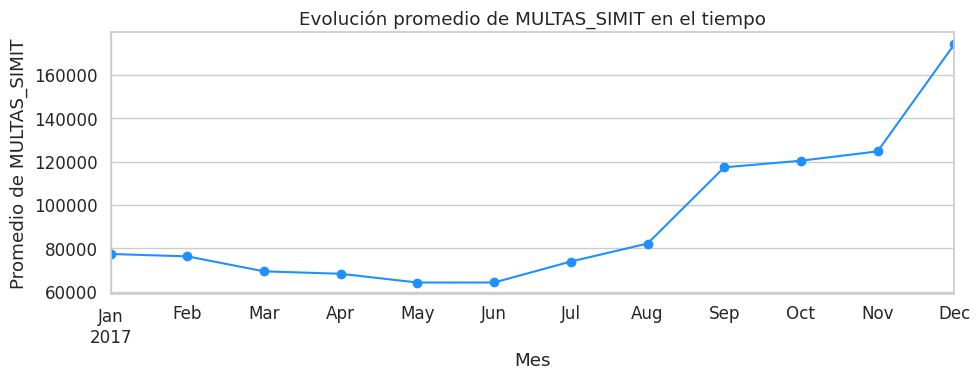

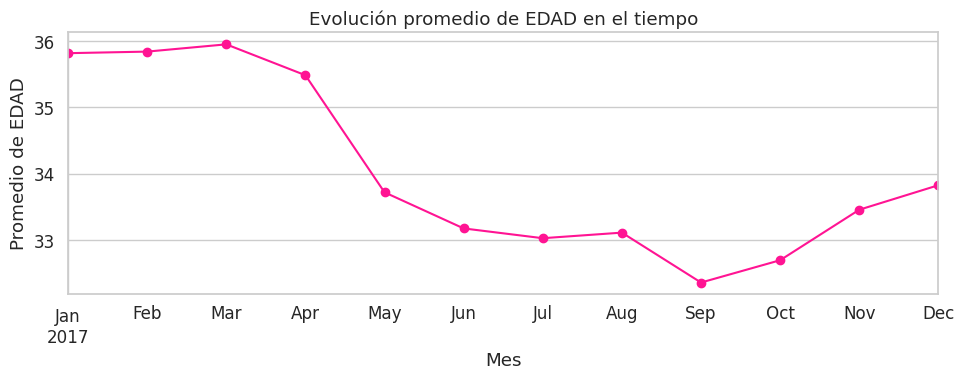

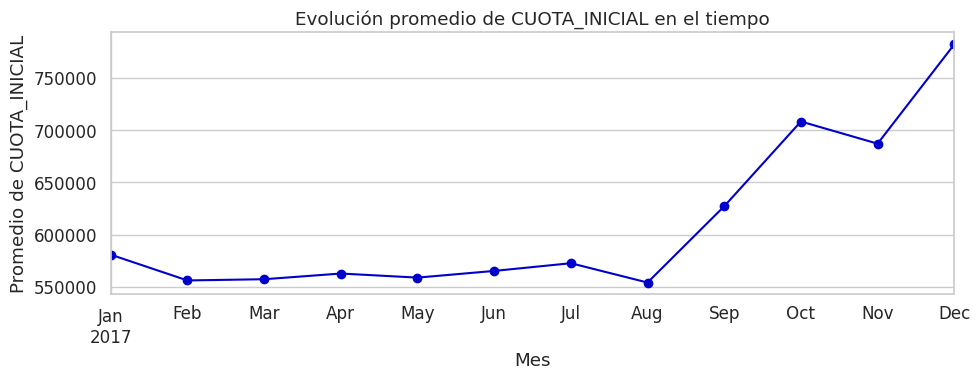

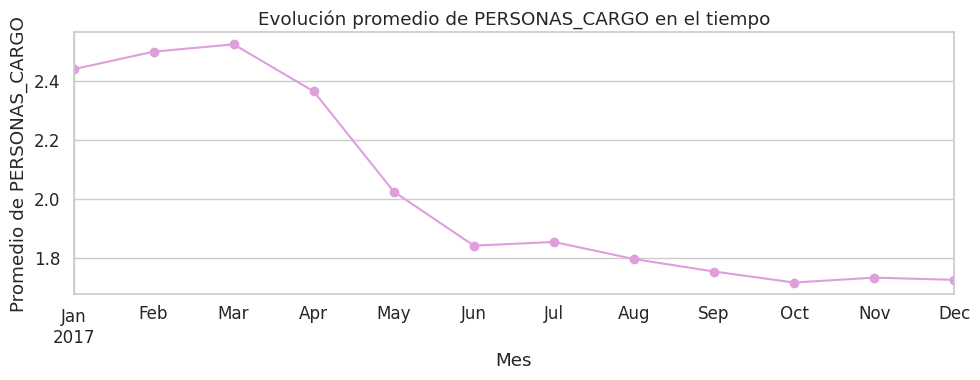

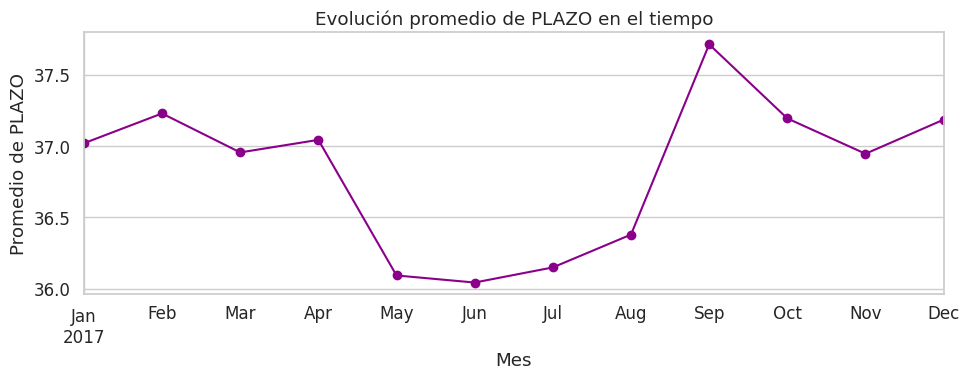

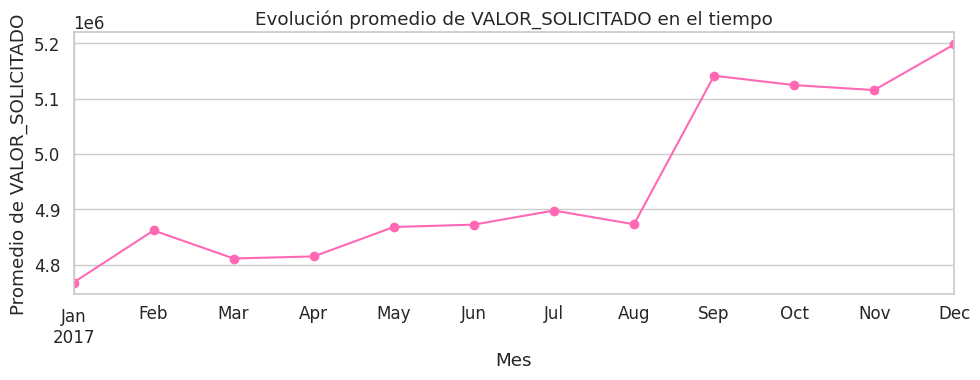

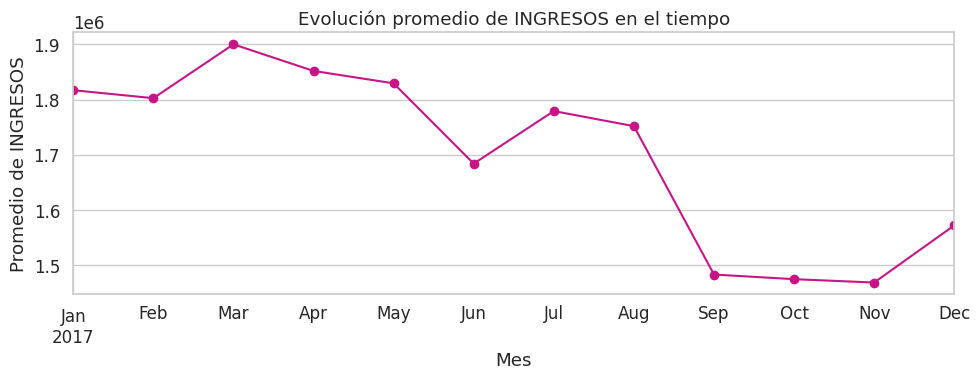

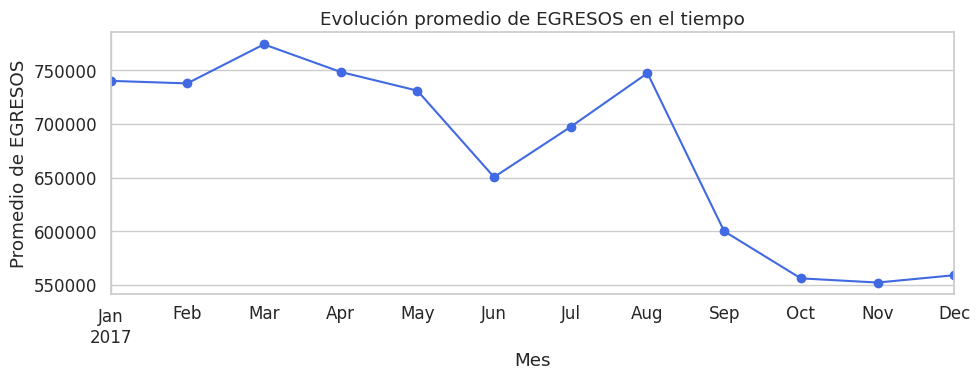

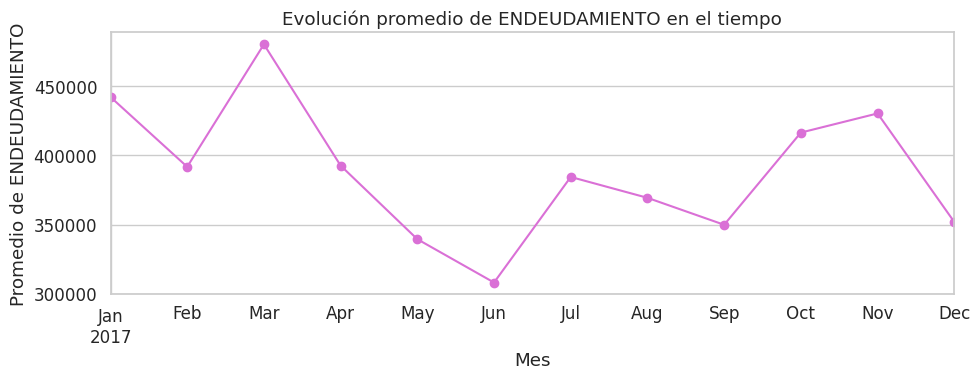

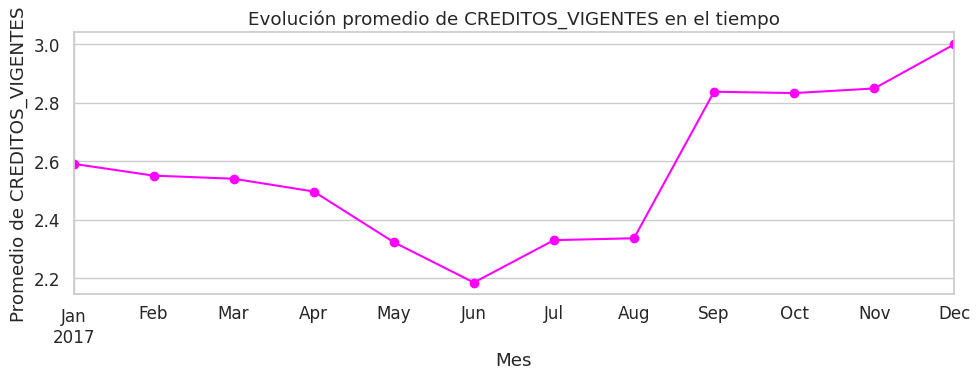

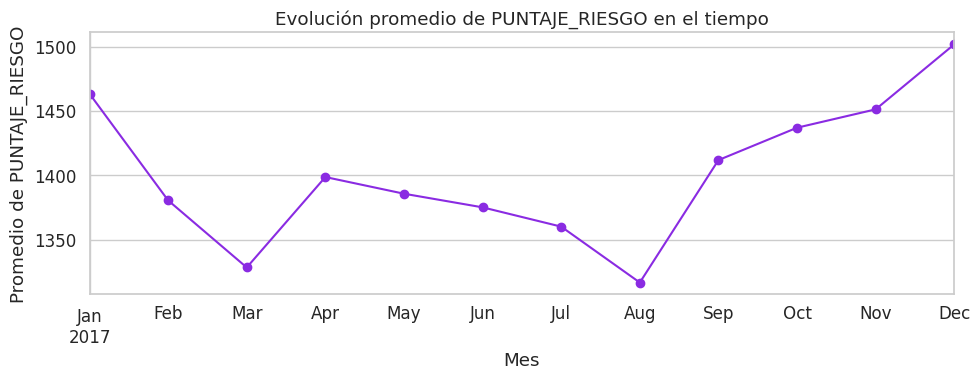

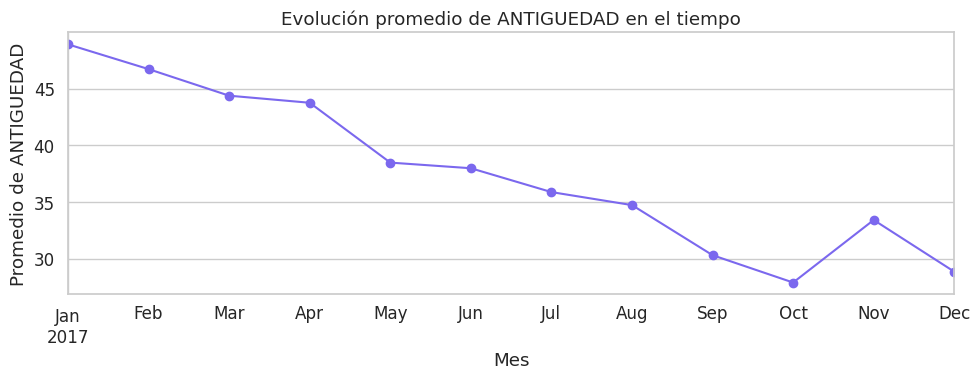

In [ ]:
colors = [
    'dodgerblue',
    'deeppink',
    'mediumblue',
    'plum',
    'darkmagenta',
    'hotpink',
    'mediumvioletred',
    'royalblue',
    'orchid',
    'fuchsia',
    'blueviolet',
    'mediumslateblue'
]

for col, color in zip(numCols, colors):
    analizar_cambio_tiempo(df_clean, col, colore=color)

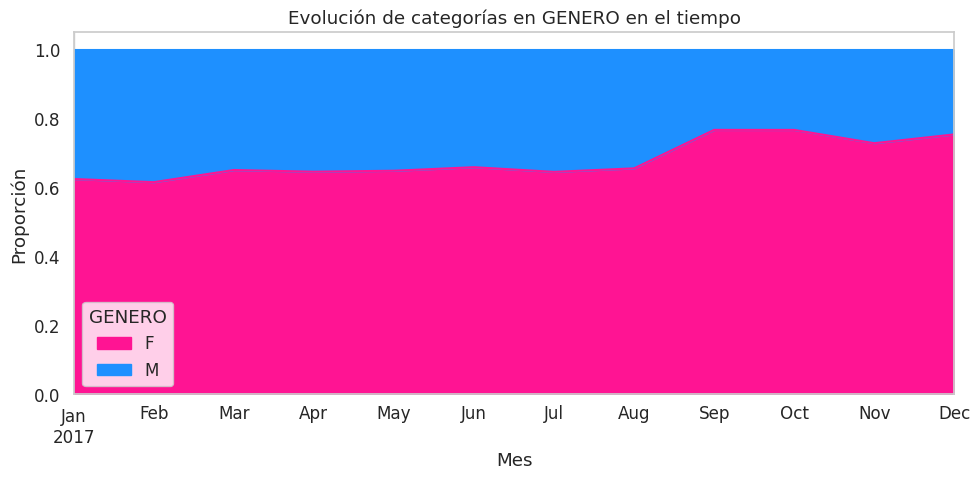

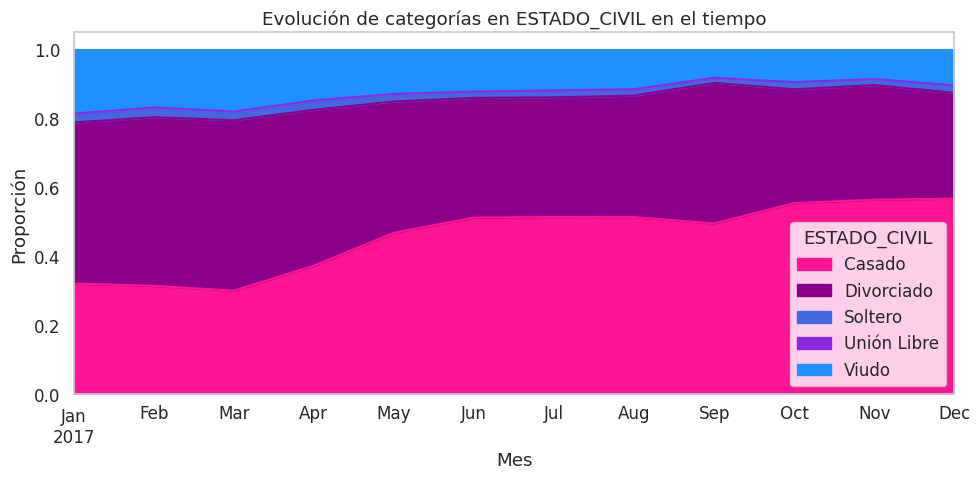

<ipython-input-53-2df0618ec3f3>:22: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



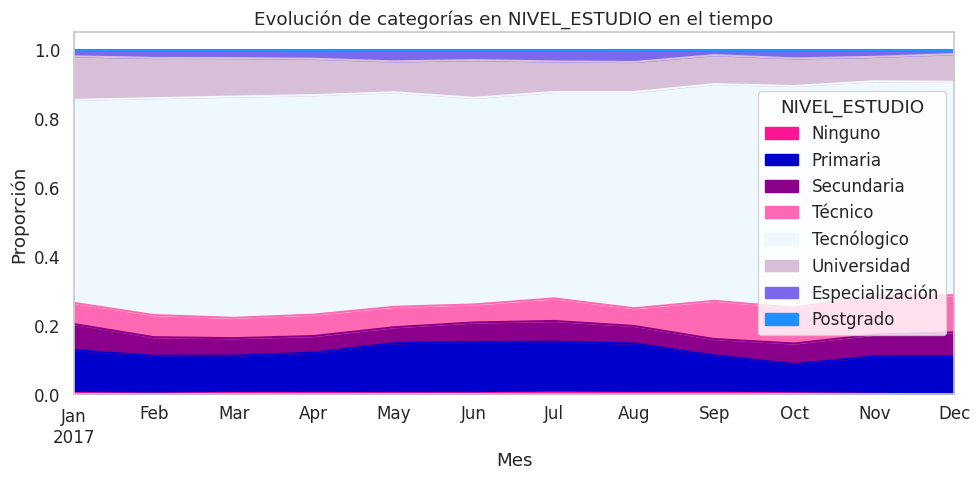

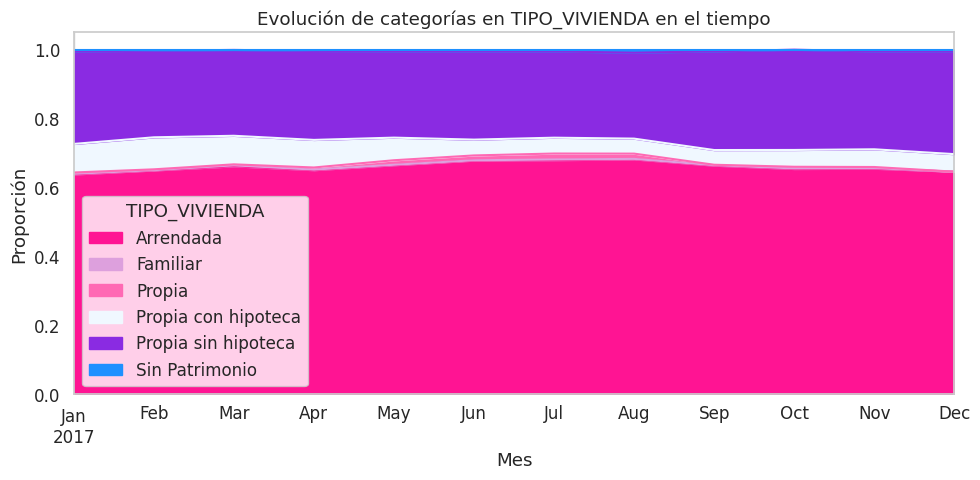

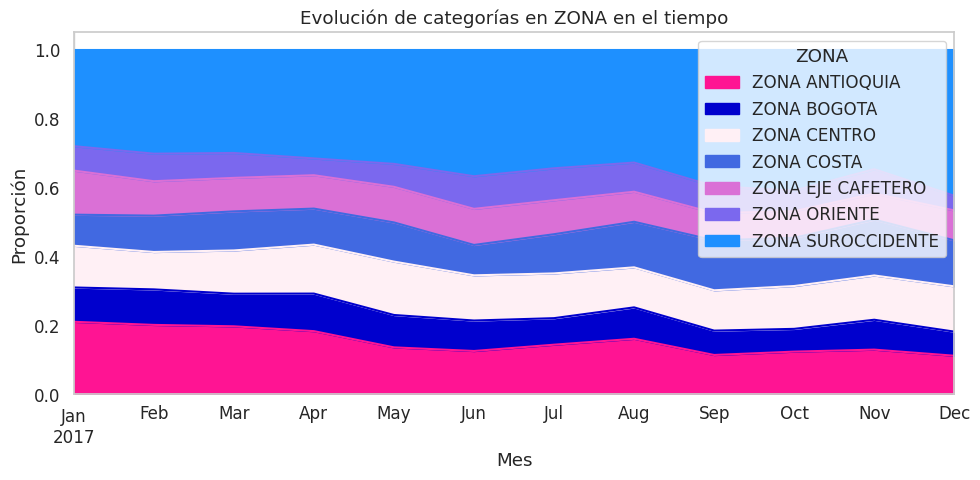

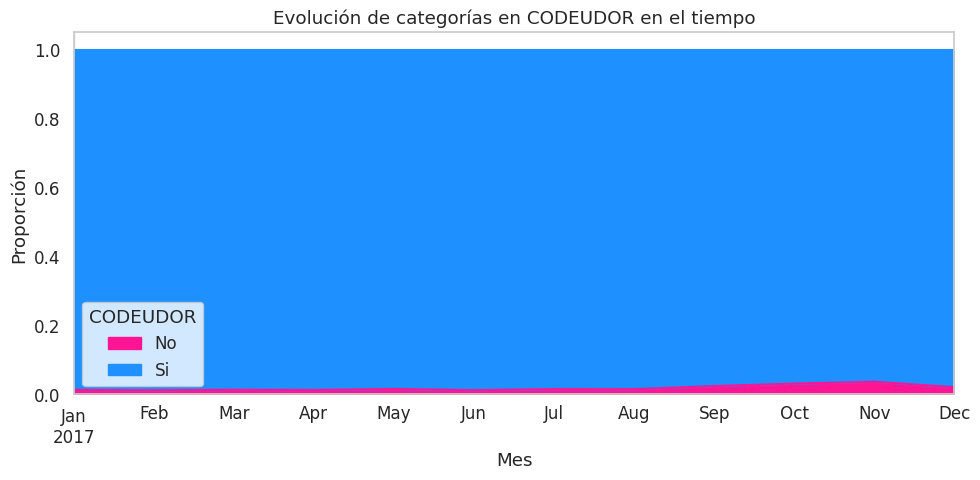

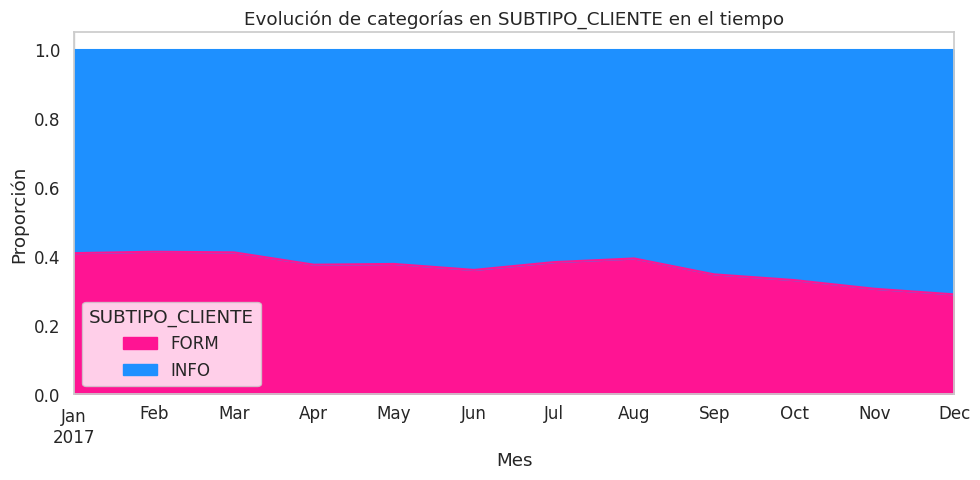

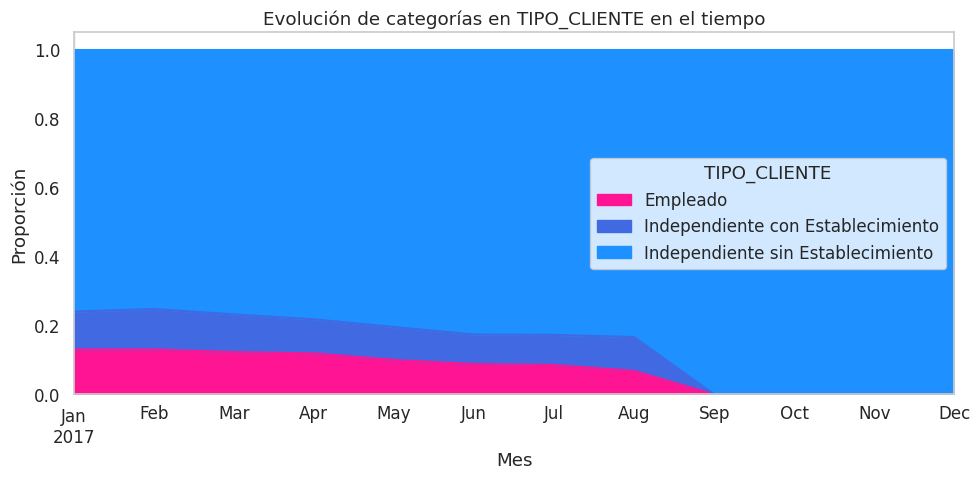

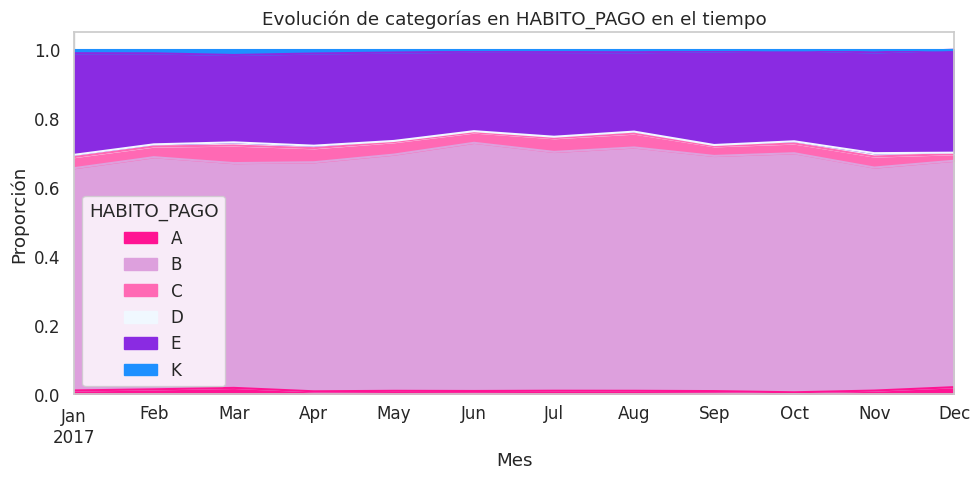

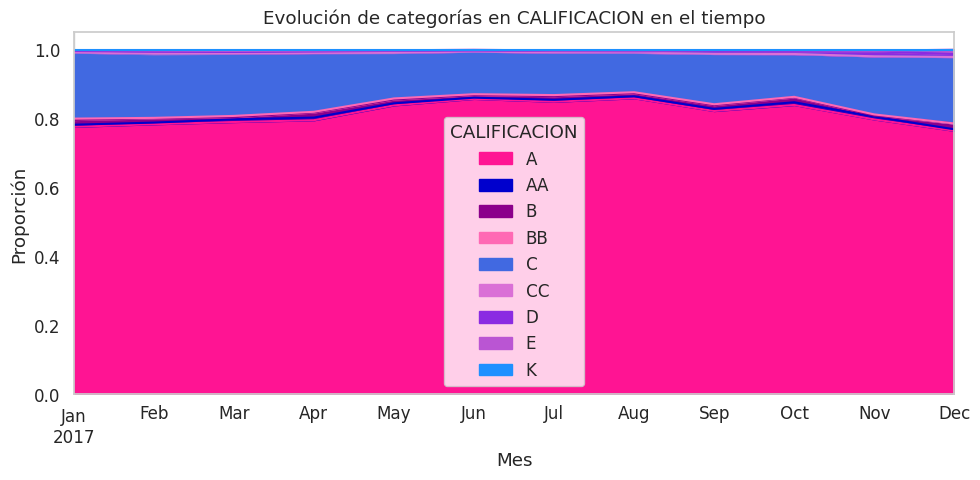

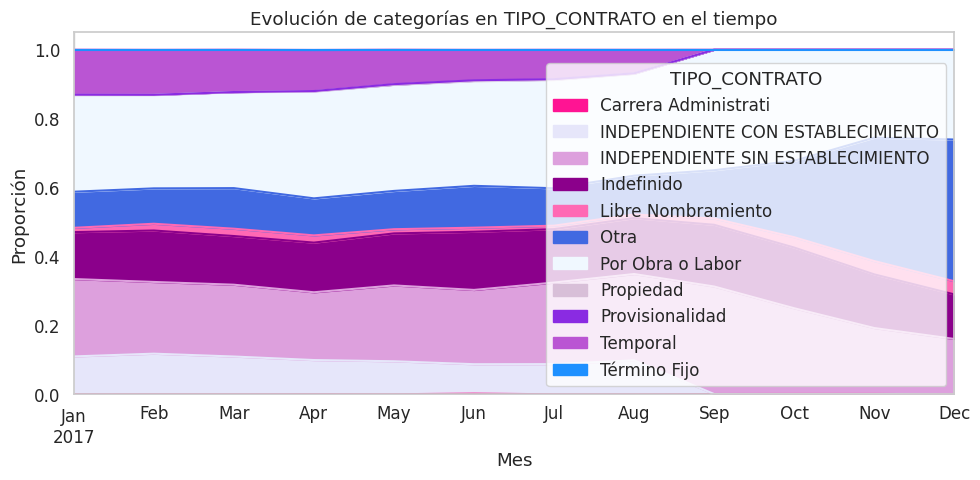

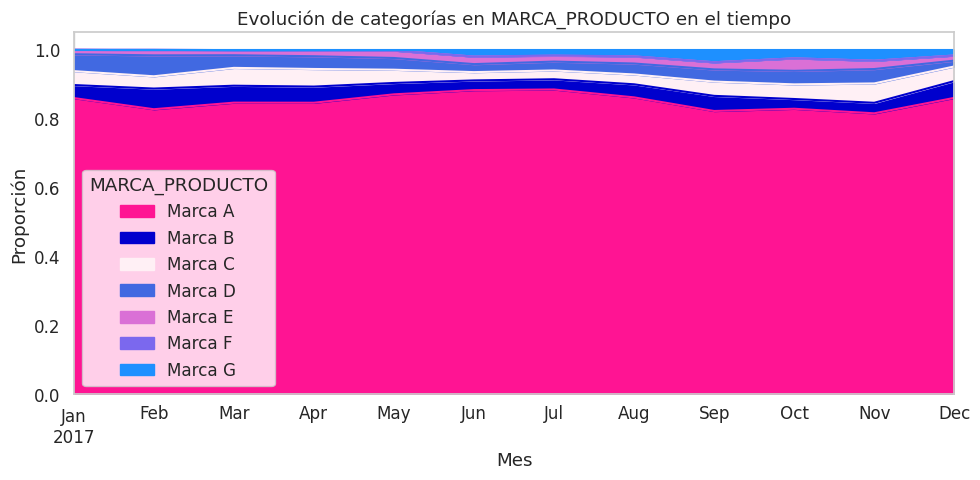

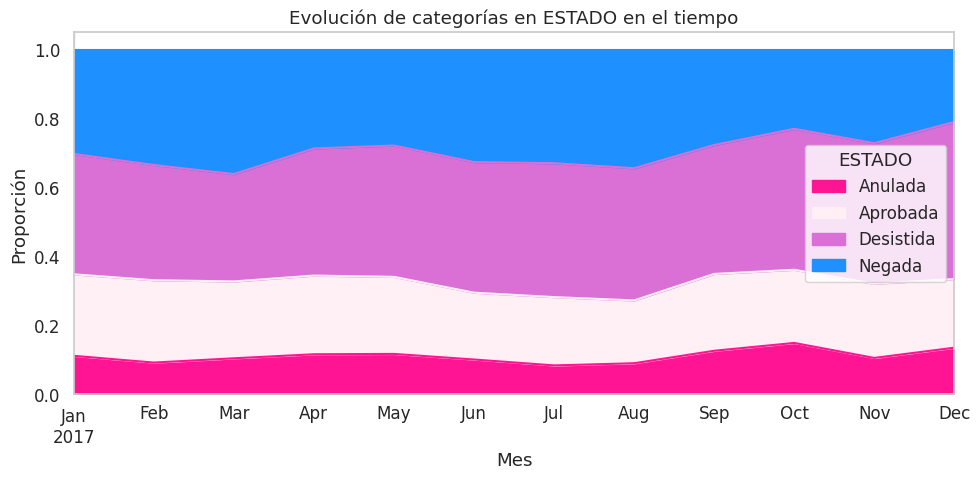

In [ ]:
colors = [
    'deeppink',
    'lavender',
    'mediumblue',
    'plum',
    'darkmagenta',
    'lavenderblush',
    'hotpink',
    'mediumvioletred',
    'royalblue',
    'aliceblue',
    'orchid',
    'thistle',
    'blueviolet',
    'mediumslateblue',
    'mediumorchid',
    'dodgerblue'
]

custom_cmap =  mcolors.ListedColormap(colors)

for col in CatCols:
    analizar_cambio_tiempo(df_clean, col, map=custom_cmap)

In [ ]:
def analizar_cambio_tiempo(df_clean, columna, fecha='FECHA_INICIO', colore=None,map='tab10'):
    # Convertir columna de fecha a tipo datetime
    df_clean[fecha] = pd.to_datetime(df_clean[fecha])

    # Crear columna de período
    df_clean['AÑO_MES'] = df_clean[fecha].dt.to_period('M')

    # Comprobar tipo de variable
    if pd.api.types.is_numeric_dtype(df_clean[columna]):
        # Agrupar por mes y calcular promedio
        resumen = df_clean.groupby('AÑO_MES')[columna].mean()
        resumen.plot(kind='line', marker='o', figsize=(10, 4),color=colore)
        plt.title(f'Evolución promedio de {columna} en el tiempo')
        plt.ylabel(f'Promedio de {columna}')
        plt.xlabel('Mes')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    else:
        # Agrupar por categoría en cada mes
        resumen = df_clean.groupby(['AÑO_MES', columna]).size().unstack(fill_value=0)
        resumen = resumen.div(resumen.sum(axis=1), axis=0)  # proporción por mes
        resumen.plot(kind='area', stacked=True, figsize=(14, 5), colormap= map)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.tight_layout()
        plt.title(f'Evolución de categorías en {columna} en el tiempo')
        plt.ylabel('Proporción')
        plt.xlabel('Mes')
        plt.tight_layout()
        plt.show()

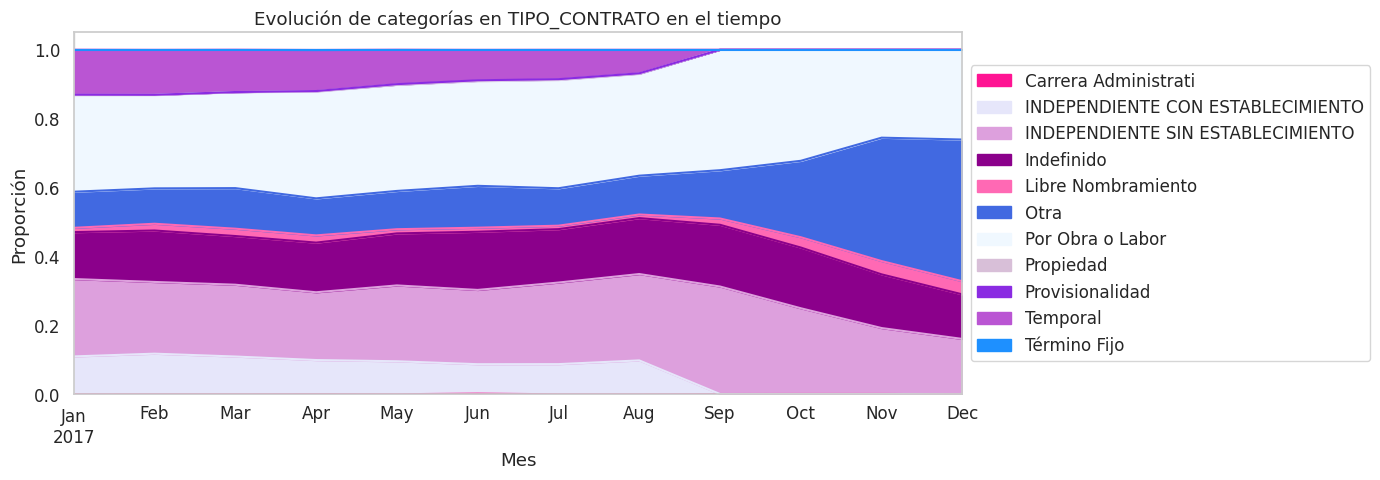

In [ ]:
analizar_cambio_tiempo(df_clean,'TIPO_CONTRATO', map=custom_cmap)


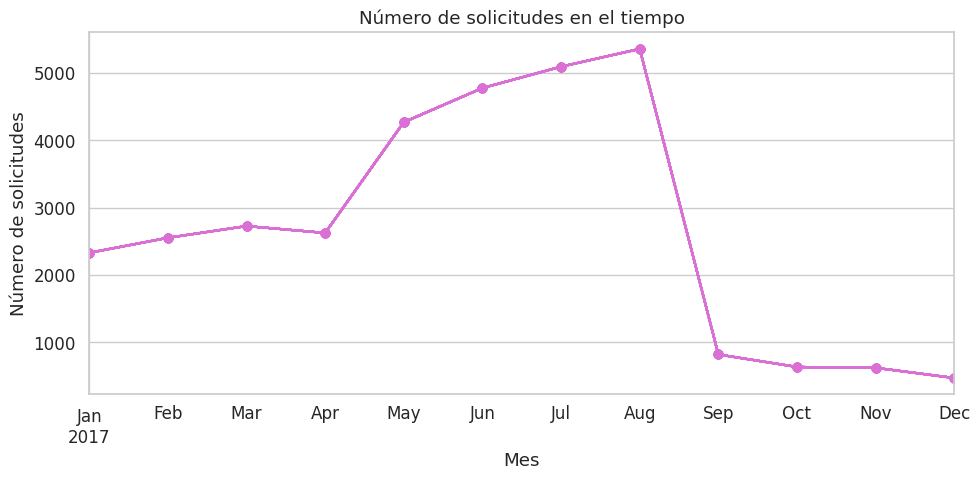

In [ ]:
resumen = df_clean.groupby('AÑO_MES').count()
resumen.plot(kind='line', marker='o', figsize=(10, 5),color='orchid')
plt.legend().remove()
plt.title(f'Número de solicitudes en el tiempo')
plt.ylabel(f'Número de solicitudes')
plt.xlabel('Mes')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
def resumen_estadistico(df):
    resumen = {}

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            resumen[col] = {
                'Promedio': df[col].mean(),
                'Mediana': df[col].median(),
                'Desviación estándar': df[col].std()
            }
        elif isinstance(df[col].dtype, pd.CategoricalDtype) or df[col].dtype == 'object' or df[col].dtype == 'string[python]' :
            resumen[col] = {
                'Moda': df[col].mode().iloc[0] if not df[col].mode().empty else np.nan,
                'Proporciones': df[col].value_counts(normalize=True).to_dict()
            }
    return resumen


In [ ]:
apr=df_clean[df_clean['ESTADO']=='Aprobada']
resumen_estadistico(apr)

{'SOLICITUD': {'Promedio': np.float64(16545.647145596697),
  'Mediana': 16161.0,
  'Desviación estándar': 9923.819171159186},
 'MULTAS_SIMIT': {'Promedio': np.float64(53773.68450213896),
  'Mediana': 0.0,
  'Desviación estándar': 215477.18198095664},
 'EDAD': {'Promedio': np.float64(33.5047942174362),
  'Mediana': 30.0,
  'Desviación estándar': 10.607391726939163},
 'CUOTA_INICIAL': {'Promedio': np.float64(595515.534297094),
  'Mediana': 436500.0,
  'Desviación estándar': 621553.2334762691},
 'GENERO': {'Moda': 'F',
  'Proporciones': {'F': 0.6613069774302994, 'M': 0.3386930225697005}},
 'ESTADO_CIVIL': {'Moda': 'Casado',
  'Proporciones': {'Casado': 0.45699955745685206,
   'Divorciado': 0.387667797610267,
   'Viudo': 0.13438560259625312,
   'Soltero': 0.01799675468358165,
   'Unión Libre': 0.002950287653046172}},
 'NIVEL_ESTUDIO': {'Moda': 'Tecnólogico',
  'Proporciones': {'Tecnólogico': 0.6090868859713822,
   'Primaria': 0.1304027142646408,
   'Universidad': 0.0978020356984806,
   'Té

In [ ]:
df_clean['ESTADO_BINARIA'] = (df_clean['ESTADO'] == 'Aprobada').astype(int)
correlaciones = df_clean.corr(numeric_only=True)  # Only numerical variables
correlaciones['ESTADO_BINARIA'].sort_values(ascending=False)

,ESTADO_BINARIA
ESTADO_BINARIA,1.000000
EGRESOS,0.077132
PUNTAJE_RIESGO,0.046163
INGRESOS,0.035218
PORCENTAJE_CUOTA_INICIAL,0.033469
PLAZO,0.027905
CUOTA_INICIAL,0.018199
ANTIGUEDAD,-0.000013
PERSONAS_CARGO,-0.012031
SOLICITUD,-0.014290


In [ ]:
from sklearn.ensemble import RandomForestClassifier

<Axes: >

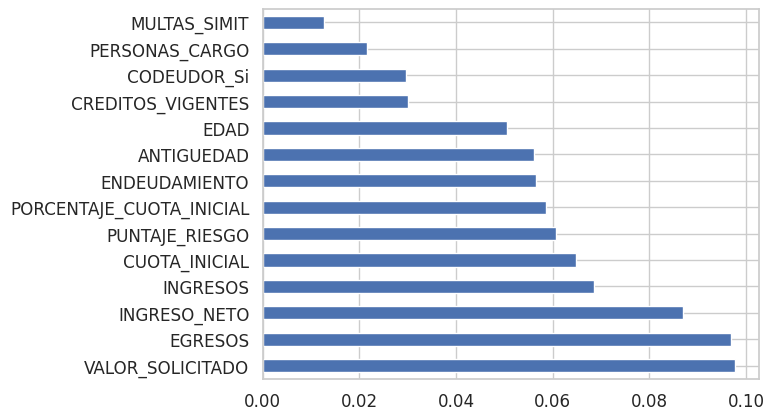

In [ ]:
df_model = df_clean.copy()
df_model['aprobado'] = (df_model['ESTADO'] == 'Aprobada').astype(int)

# Explicitly drop the date columns from the features
X = pd.get_dummies(df_model.drop(columns=['ESTADO', 'aprobado', 'FECHA_INICIO', 'AÑO_MES','ESTADO_BINARIA','PLAZO','SOLICITUD']), drop_first=True)
y = df_model['aprobado']

model = RandomForestClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(14).plot(kind='barh')

<Axes: >

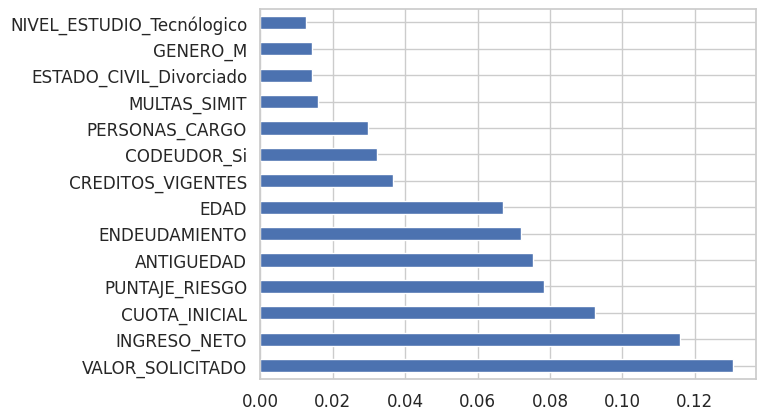

In [ ]:
df_model = df_clean.copy()
df_model['aprobado'] = (df_model['ESTADO'] == 'Aprobada').astype(int)

# Explicitly drop the date columns from the features
X = pd.get_dummies(df_model.drop(columns=['ESTADO', 'aprobado', 'FECHA_INICIO', 'AÑO_MES','ESTADO_BINARIA','PLAZO','SOLICITUD','EGRESOS','INGRESOS','PORCENTAJE_CUOTA_INICIAL']), drop_first=True)
y = df_model['aprobado']

model = RandomForestClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(14).plot(kind='barh')

<ipython-input-65-febfec061e01>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



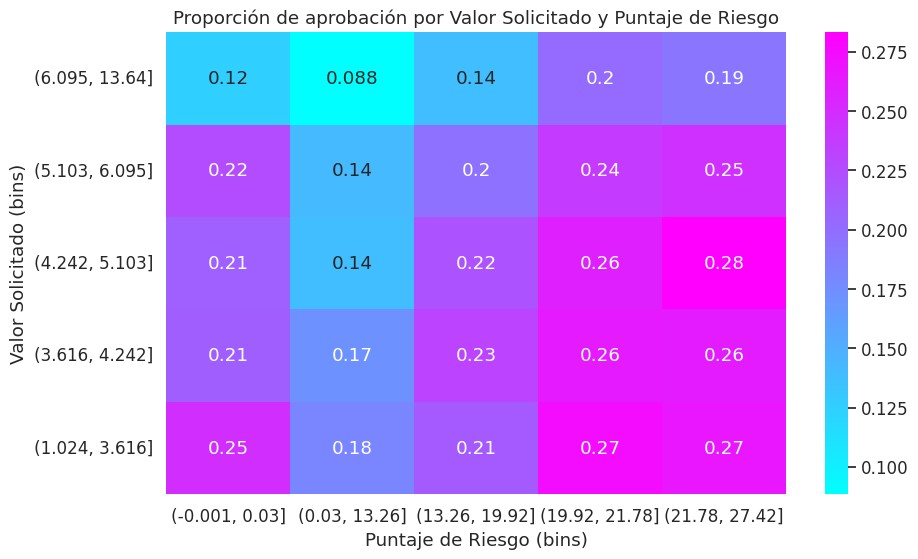

In [ ]:
# Agrupar en bins

df_clean['Aprobado'] = (df_clean['ESTADO'] == 'Aprobada').astype(int)
# Remove the square brackets around pd.qcut
df_clean['valor_bin'] = pd.qcut(df_clean['VALOR_SOLICITADO']/1000000, q=5)
df_clean['riesgo_bin'] = pd.qcut(df_clean['PUNTAJE_RIESGO']/100, q=5)

# Tabla de proporciones de aprobación
tabla = df_clean.groupby(['valor_bin', 'riesgo_bin'])['Aprobado'].mean().unstack()
# Heatmap
plt.figure(figsize=(10,6))
ax=sns.heatmap(tabla, annot=True, cmap='cool')
ax.invert_yaxis()
plt.title('Proporción de aprobación por Valor Solicitado y Puntaje de Riesgo')
plt.xlabel('Puntaje de Riesgo (bins)')
plt.ylabel('Valor Solicitado (bins)')
plt.show()

In [ ]:
def visualizar_aprobacion_por_categoria(df, variable, bins=6):
    # Crear variable binaria de aprobación
    df = df.copy()
    df['aprobado'] = (df['ESTADO'] == 'Aprobada').astype(int)

    # Si la variable es numérica, convertirla en categorías
    if pd.api.types.is_numeric_dtype(df[variable]):
        df[variable + '_binned'] = pd.qcut(df[variable], q=bins, duplicates='drop')
        variable_plot = variable + '_binned'
    else:
        variable_plot = variable

    # Agrupar por categoría y calcular proporción de aprobación
    proporciones = df.groupby(variable_plot)['aprobado'].mean()

    # Ordenar por valor si es categórica ordinal
    proporciones = proporciones.sort_index()

    # Graficar
    plt.figure(figsize=(10, 5))
    sns.barplot(x=proporciones.index.astype(str), y=proporciones.values, palette= [
    'deeppink',
    'dodgerblue',
    'mediumblue',
    'plum',
    'darkmagenta',
    'hotpink',
    'mediumvioletred',
    'royalblue',
    'aliceblue',
    'orchid',
    'thistle',
    'blueviolet',
    'mediumslateblue',
    'mediumorchid',
     ])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Proporción de aprobación')
    plt.xlabel(variable)
    plt.title(f'Proporción de aprobación de crédito por {variable}')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


<ipython-input-66-8124651066e1>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-66-8124651066e1>:21: UserWarning:

The palette list has more values (14) than needed (2), which may not be intended.



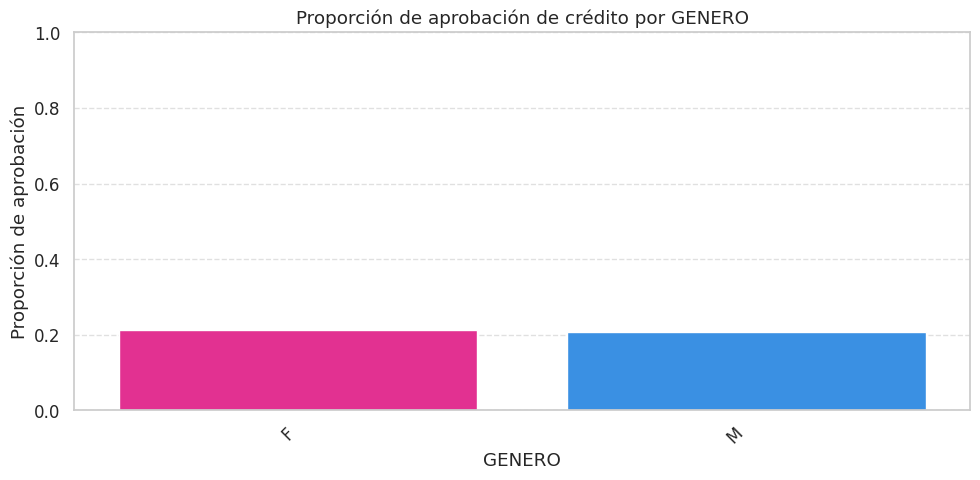

<ipython-input-66-8124651066e1>:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-66-8124651066e1>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-66-8124651066e1>:21: UserWarning:

The palette list has more values (14) than needed (6), which may not be intended.



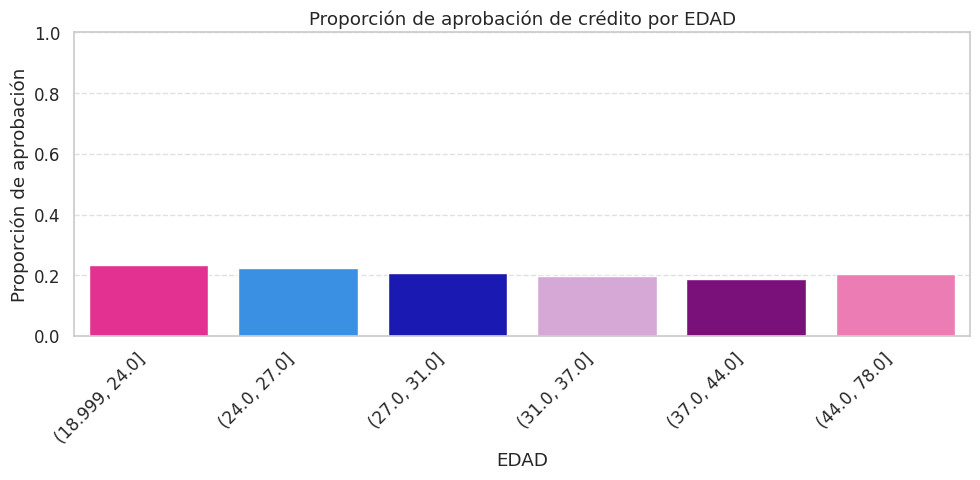

In [ ]:
for col in ['GENERO','EDAD']:
  visualizar_aprobacion_por_categoria(df_clean, col)

<ipython-input-66-8124651066e1>:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-66-8124651066e1>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-66-8124651066e1>:21: UserWarning:

The palette list has more values (14) than needed (7), which may not be intended.



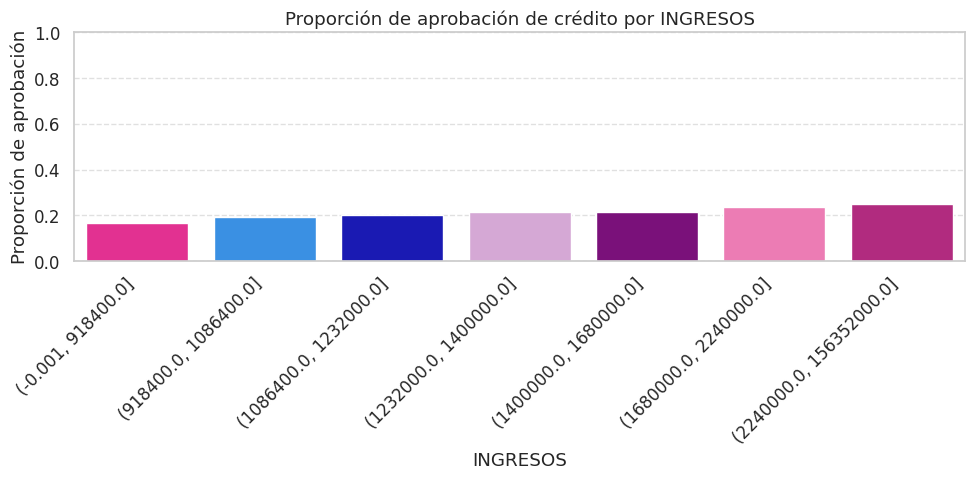

In [ ]:
visualizar_aprobacion_por_categoria(df_clean, 'INGRESOS',bins=7)

In [ ]:
porcentaje_aprobacion = (df_clean['ESTADO'] == 'Aprobada').mean()
print(f"Porcentaje general de aprobación: {porcentaje_aprobacion:.2%}")

Porcentaje general de aprobación: 21.00%


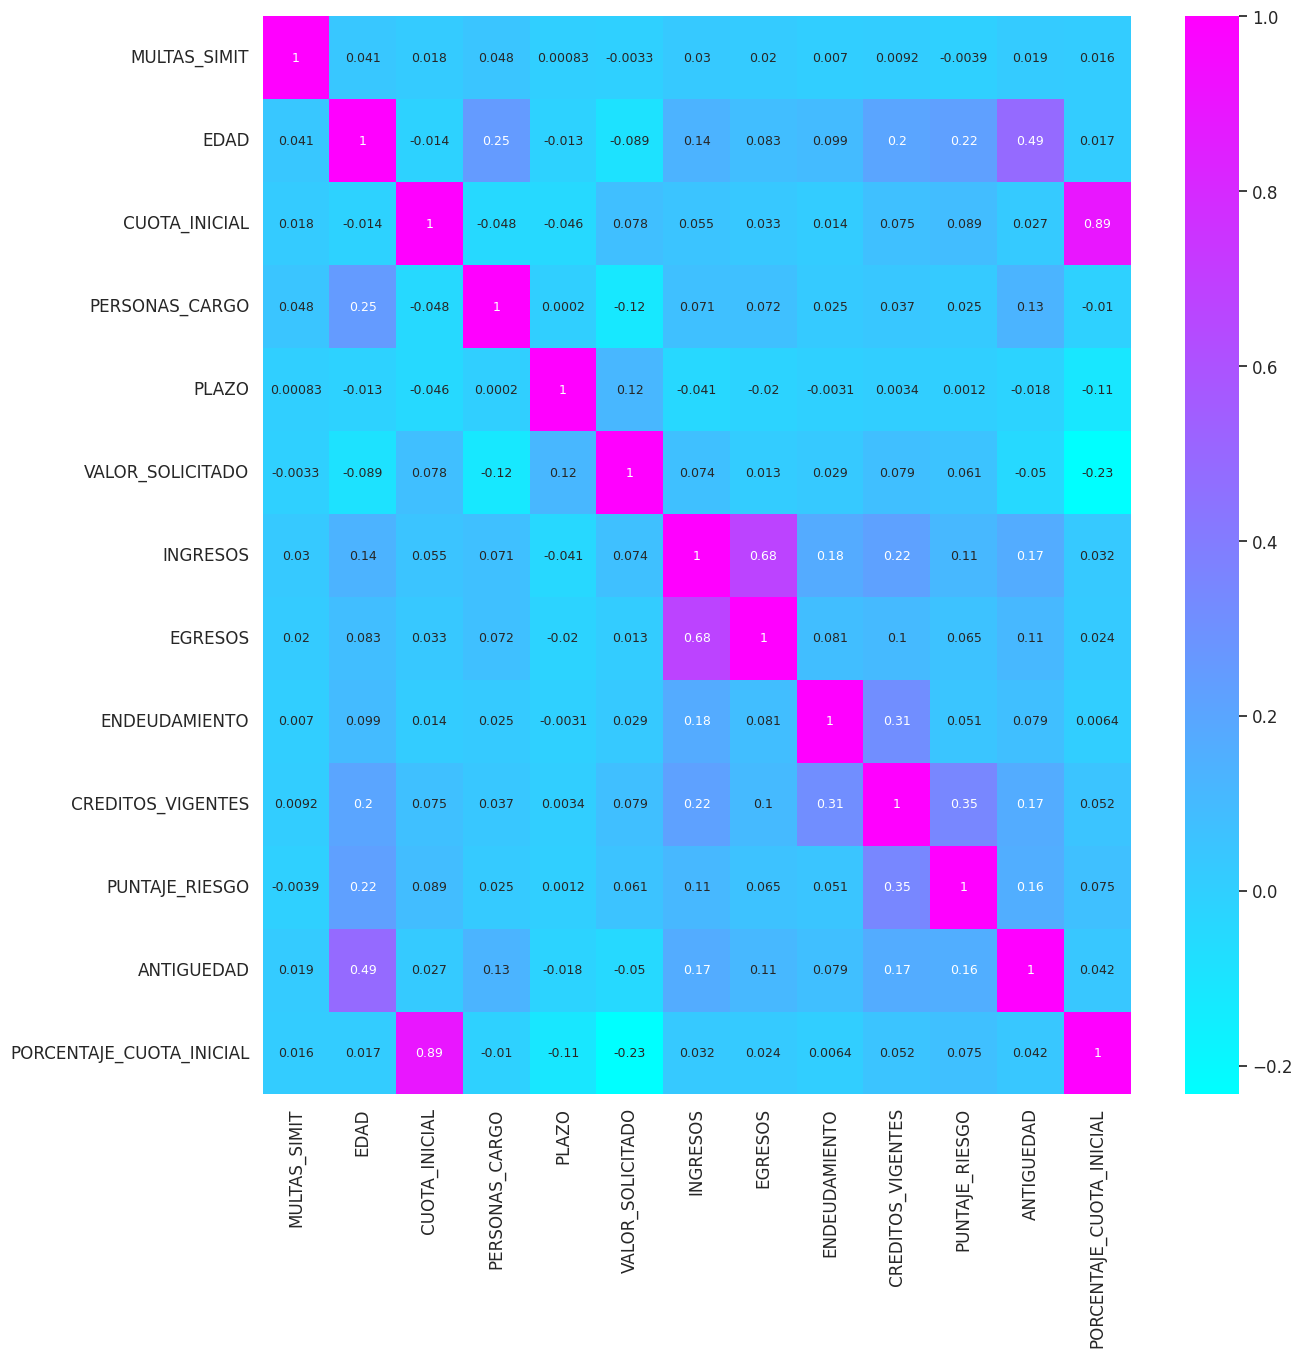

In [ ]:
#Now I will look at the data correlations to see if its usefull to use PCA
numCols.append('PORCENTAJE_CUOTA_INICIAL')
dfTn1=df_clean[numCols]
plt.figure(figsize=(14,14))
sns.heatmap(dfTn1.corr(), cmap="cool", annot=True,annot_kws={"fontsize": 9})
plt.show()

In [ ]:
df_clean.columns

Index(['SOLICITUD', 'FECHA_INICIO', 'MULTAS_SIMIT', 'EDAD', 'CUOTA_INICIAL',
       'GENERO', 'ESTADO_CIVIL', 'NIVEL_ESTUDIO', 'TIPO_VIVIENDA',
       'PERSONAS_CARGO', 'ZONA', 'PLAZO', 'CODEUDOR', 'VALOR_SOLICITADO',
       'INGRESOS', 'EGRESOS', 'SUBTIPO_CLIENTE', 'TIPO_CLIENTE', 'HABITO_PAGO',
       'ENDEUDAMIENTO', 'CALIFICACION', 'CREDITOS_VIGENTES', 'PUNTAJE_RIESGO',
       'TIPO_CONTRATO', 'ANTIGUEDAD', 'MARCA_PRODUCTO', 'ESTADO',
       'INGRESO_NETO', 'PORCENTAJE_CUOTA_INICIAL', 'AÑO_MES', 'ESTADO_BINARIA',
       'Aprobado', 'valor_bin', 'riesgo_bin'],
      dtype='object')

In [ ]:
model_df=df_clean.copy()
model_df=model_df.drop(columns=['ENDEUDAMIENTO','SOLICITUD',
                       'PERSONAS_CARGO','FECHA_INICIO','AÑO_MES','ESTADO','SUBTIPO_CLIENTE',
                       'CUOTA_INICIAL','Aprobado',	'TIPO_CLIENTE','valor_bin',	'riesgo_bin','MARCA_PRODUCTO'])

In [ ]:
maps=[ {'F': 0,'M': 1}, {'No':0,'Si':1},
 {'Ninguno': 0, 'Primaria': 1, 'Secundaria': 2,'Técnico': 3, 'Tecnólogico': 4,  'Universidad': 5, 'Especialización': 6,  'Postgrado': 7},
 {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'K':5},
 {'AA':0,'A':1,'BB':2,'B':3,'CC':4,'C':5,'D':6,'E':7,'K':8}]

ord_cols=['GENERO','CODEUDOR','NIVEL_ESTUDIO','HABITO_PAGO','CALIFICACION']

for col, mapping in zip(ord_cols, maps):
    model_df[col] = model_df[col].astype(str).str.strip().map(mapping)

model_df=pd.get_dummies (model_df, columns=['ESTADO_CIVIL','TIPO_VIVIENDA','ZONA','TIPO_CONTRATO']) #'MARCA_PRODUCTO'])

In [ ]:
model_df.head()

,MULTAS_SIMIT,EDAD,GENERO,NIVEL_ESTUDIO,PLAZO,CODEUDOR,VALOR_SOLICITADO,INGRESOS,EGRESOS,HABITO_PAGO,...,TIPO_CONTRATO_INDEPENDIENTE CON ESTABLECIMIENTO,TIPO_CONTRATO_INDEPENDIENTE SIN ESTABLECIMIENTO,TIPO_CONTRATO_Indefinido,TIPO_CONTRATO_Libre Nombramiento,TIPO_CONTRATO_Otra,TIPO_CONTRATO_Por Obra o Labor,TIPO_CONTRATO_Propiedad,TIPO_CONTRATO_Provisionalidad,TIPO_CONTRATO_Temporal,TIPO_CONTRATO_Término Fijo
0,0.0,29,0,4,48,1,4513950.0,1157971.36,576300.0,1,...,False,False,True,False,False,False,False,False,False,False
1,0.0,60,0,4,48,1,5301450.0,1253775.04,339000.0,4,...,False,False,False,False,False,True,False,False,False,False
2,0.0,61,1,4,36,1,4961250.0,772189.60,226000.0,4,...,False,False,True,False,False,False,False,False,False,False
3,0.0,25,1,4,36,1,4513950.0,862400.00,395500.0,1,...,False,False,False,False,True,False,False,False,False,False
4,0.0,30,0,4,48,1,7579950.0,2016000.00,1209100.0,1,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
X=model_df.drop(columns=['ESTADO_BINARIA'])
y=model_df['ESTADO_BINARIA']

In [ ]:
X1 = X.astype({col: 'int' for col in X.select_dtypes('bool').columns})

In [ ]:
X1.head()

,MULTAS_SIMIT,EDAD,GENERO,NIVEL_ESTUDIO,PLAZO,CODEUDOR,VALOR_SOLICITADO,INGRESOS,EGRESOS,HABITO_PAGO,...,TIPO_CONTRATO_INDEPENDIENTE CON ESTABLECIMIENTO,TIPO_CONTRATO_INDEPENDIENTE SIN ESTABLECIMIENTO,TIPO_CONTRATO_Indefinido,TIPO_CONTRATO_Libre Nombramiento,TIPO_CONTRATO_Otra,TIPO_CONTRATO_Por Obra o Labor,TIPO_CONTRATO_Propiedad,TIPO_CONTRATO_Provisionalidad,TIPO_CONTRATO_Temporal,TIPO_CONTRATO_Término Fijo
0,0.0,29,0,4,48,1,4513950.0,1157971.36,576300.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.0,60,0,4,48,1,5301450.0,1253775.04,339000.0,4,...,0,0,0,0,0,1,0,0,0,0
2,0.0,61,1,4,36,1,4961250.0,772189.60,226000.0,4,...,0,0,1,0,0,0,0,0,0,0
3,0.0,25,1,4,36,1,4513950.0,862400.00,395500.0,1,...,0,0,0,0,1,0,0,0,0,0
4,0.0,30,0,4,48,1,7579950.0,2016000.00,1209100.0,1,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=27)

In [ ]:
# 1. Combine X_train and y_train into a single DataFrame
train_df = X_train.copy()
train_df['ESTADO_BINARIA'] = y_train.copy()

# 2. Split by class
minority = train_df[train_df['ESTADO_BINARIA'] == 1]
majority = train_df[train_df['ESTADO_BINARIA'] == 0]

# 3. Undersample the majority class
majority_sample = majority.sample(n=len(minority), random_state=42)

# 4. Concatenate and shuffle
balanced_train = pd.concat([minority, majority_sample])
balanced_train = balanced_train.sample(frac=1, random_state=42).reset_index(drop=True)

# 5. Separate X and y again
X_train_b = balanced_train.drop(columns='ESTADO_BINARIA')
y_train_b = balanced_train['ESTADO_BINARIA']

In [ ]:
scaler_train = StandardScaler()
X_train = pd.DataFrame(
    scaler_train.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test = pd.DataFrame(
    scaler_train.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

scaler_train_b = StandardScaler()
X_train_b = pd.DataFrame(
    scaler_train_b.fit_transform(X_train_b),
    columns=X_train_b.columns,
    index=X_train_b.index
)

X_test_b = pd.DataFrame(
    scaler_train_b.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

In [ ]:
model_undersampled =RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=27)
model_undersampled.fit(X_train_b, y_train_b)

RandomForestClassifier(class_weight='balanced', random_state=27)

In [ ]:
model_full =RandomForestClassifier(n_estimators=100, random_state=27)
model_full.fit(X_train, y_train)

RandomForestClassifier(random_state=27)

In [ ]:
def custom_predict():
    # Predict 1s with the undersampled model

    prediction_1 = model_undersampled.predict(X_test_b)

    # Predict 0s with the full dataset model
    prediction_0 = model_full.predict(X_test)

    # Combine predictions: if Model 1 predicts 1, keep 1; else use Model 2's prediction
    final_prediction = [
    1 if p1 == 1 and p0 == 1 else 0
    for p1, p0 in zip(prediction_1, prediction_0)]

    #final_prediction = [p1 if p1 == 1 else p0 for p1, p0 in zip(prediction_1, prediction_0)]

    return final_prediction

In [ ]:
def custom_predict1():
    # Predict 1s with the undersampled model
    prob_1 = model_undersampled.predict_proba(X_test_b)[:, 1]
    prob_0 = model_full.predict_proba(X_test)[:, 1]


    # Combine predictions: if Model 1 predicts 1, keep 1; else use Model 2's prediction
    final_preds = []
    combined_prob = 0.67 * prob_1 + 0.33 * prob_0

     # Custom threshold
    final_preds = [1 if p >= 0.5 else 0 for p in combined_prob]
    '''for pA, pB in zip(preds_A, preds_B):
        if pB == 1:
            final_preds.append(1)
        else:
            final_preds.append(pA)  # fallback to model_A'''

    return final_preds

In [ ]:
from sklearn.metrics import f1_score, precision_score  # Puedes cambiar esto por recall_score, roc_auc_score, etc.
from dask import delayed, compute
from dask.diagnostics import ProgressBar

In [ ]:


# Generar todas las combinaciones posibles
a_values = np.round(np.arange(0.01, 1.00, 0.01), 2)
c_values = np.round(np.arange(0.1, 0.9, 0.05), 2)
d_values = np.round(np.arange(0.1, 0.9, 0.05), 2)
E_values = np.round(np.arange(0.01, 1.00, 0.01), 2)
# Predicciones de probabilidad crudas (no binarizadas)
prob_1_raw = model_undersampled.predict_proba(X_test_b)[:, 1]
prob_0_raw = model_full.predict_proba(X_test)[:, 1]

@delayed
def evaluate_combination(a, c, d, E=0.5):
    b = round(1 - a, 2)

    # Get raw probabilities
    prob_1 = (model_undersampled.predict_proba(X_test_b)[:, 1] > c).astype(int)
    prob_0 = (model_full.predict_proba(X_test)[:, 1] > d).astype(int)
    # Combine raw probabilities using weights
    combined_prob = a * prob_1 + b * prob_0

    # Final prediction after applying combined threshold
    y_pred = (combined_prob >= E).astype(int)

    score = f1_score(y_test, y_pred)

    return {
        'a': a,
        'b': b,
        'c': c,
        'd': d,
        'E': E,
        'f1': score
    }


# Crear lista de tareas
tasks = [
    evaluate_combination(a, c, d)
    for a in a_values
    for c in c_values
    for d in d_values
]

# Ejecutar con progreso visible
with ProgressBar():
    results = compute(*tasks)

# Convertir a DataFrame para análisis
results_df = pd.DataFrame(results)

# Obtener la mejor combinación
best = results_df.loc[results_df['f1'].idxmax()]
print(f"Mejor combinación: a={best.a}, b={best.b}, c={best.c}, d={best.d}, F1-score={best.f1:.4f}")

[########################################] | 100% Completed | 87m 7s
Mejor combinación: a=0.01, b=0.99, c=0.1, d=0.2, F1-score=0.4465


In [ ]:


def  bes(a=0.01, c=0.1, d=0.2, E=0.5): #Dado E=0.5
    b = round(1 - a, 2)

    # Get raw probabilities
    prob_1 = (model_undersampled.predict_proba(X_test_b)[:, 1] > c).astype(int)
    prob_0 = (model_full.predict_proba(X_test)[:, 1] > d).astype(int)
    # Combine raw probabilities using weights
    combined_prob = a * prob_1 + b * prob_0

    # Final prediction after applying combined threshold
    y_pred = (combined_prob >= E).astype(int)

    score = f1_score(y_test, y_pred)

    return y_pred

In [ ]:


# Generar todas las combinaciones posibles
E_values = np.round(np.arange(0.01, 1.00, 0.001), 3)
# Predicciones de probabilidad crudas (no binarizadas)
prob_1_raw = model_undersampled.predict_proba(X_test_b)[:, 1]
prob_0_raw = model_full.predict_proba(X_test)[:, 1]

@delayed
def evaluate_combinationE(E, a=0.01, c=0.1, d=0.2 ):
    b = round(1 - a, 2)

    # Get raw probabilities
    prob_1 = (model_undersampled.predict_proba(X_test_b)[:, 1] > c).astype(int)
    prob_0 = (model_full.predict_proba(X_test)[:, 1] > d).astype(int)
    # Combine raw probabilities using weights
    combined_prob = a * prob_1 + b * prob_0

    # Final prediction after applying combined threshold
    y_pred = (combined_prob >= E).astype(int)

    score = accuracy_score(y_test, y_pred)

    return {
        'E': E,
        'accuracy': score
    }


# Crear lista de tareas
tasks = [
    evaluate_combinationE(E)
    for E in E_values
]

# Ejecutar con progreso visible
with ProgressBar():
    results = compute(*tasks)

# Convertir a DataFrame para análisis
results_df = pd.DataFrame(results)



[########################################] | 100% Completed | 209.94 s


AttributeError: 'Series' object has no attribute 'a'

In [ ]:


# Generar todas las combinaciones posibles
a_values = np.round(np.arange(0.01, 1.00, 0.01), 2)
c_values = np.round(np.arange(0.1, 0.9, 0.05), 2)
d_values = np.round(np.arange(0.1, 0.9, 0.05), 2)
E_values = np.round(np.arange(0.01, 1.00, 0.01), 2)
# Predicciones de probabilidad crudas (no binarizadas)
prob_1_raw = model_undersampled.predict_proba(X_test_b)[:, 1]
prob_0_raw = model_full.predict_proba(X_test)[:, 1]

@delayed
def evaluate_combination(a, c, d, E=0.5):
    b = round(1 - a, 2)

    # Get raw probabilities
    prob_1 = (model_undersampled.predict_proba(X_test_b)[:, 1] > c).astype(int)
    prob_0 = (model_full.predict_proba(X_test)[:, 1] > d).astype(int)
    # Combine raw probabilities using weights
    combined_prob = a * prob_1 + b * prob_0

    # Final prediction after applying combined threshold
    y_pred = (combined_prob >= E).astype(int)

    score1 = accuracy_score(y_test, y_pred)
    score = f1_score(y_test, y_pred)

    return {
        'a': a,
        'b': b,
        'c': c,
        'd': d,
        'E': E,
        'accuracy': score1,
        'f1': score
    }


# Crear lista de tareas
tasks = [
    evaluate_combination(a, c, d)
    for a in a_values
    for c in c_values
    for d in d_values
]

# Ejecutar con progreso visible
with ProgressBar():
    results = compute(*tasks)

# Convertir a DataFrame para análisis
results_df = pd.DataFrame(results)

# Obtener la mejor combinación
results_df['combined_score'] = results_df['accuracy'] * 0.5 + results_df['f1'] * 0.5
best = results_df.loc[results_df['combined_score'].idxmax()]
#best = results_df.loc[results_df['accuracy'].idxmax()]
print(f"Mejor combinación: a={best.a}, b={best.b}, c={best.c}, d={best.d}, accuracy={best.accuracy:.4f}")

[########################################] | 100% Completed | 95m 10s
Mejor combinación: a=0.01, b=0.99, c=0.1, d=0.3, accuracy=0.7274


In [ ]:
y_pred=bes(a=0.01, c=0.1, d=0.3)
conf_matrix=confusion_matrix(y_test, y_pred)
class_report=classification_report(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)
print("\nReporte de clasificación:\n", class_report)
print("\nPrecisión del modelo:", accuracy)

Matriz de confusión:
 [[4060 1070]
 [ 690  637]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      5130
           1       0.37      0.48      0.42      1327

    accuracy                           0.73      6457
   macro avg       0.61      0.64      0.62      6457
weighted avg       0.76      0.73      0.74      6457


Precisión del modelo: 0.727427597955707


In [ ]:
# Obtener la mejor combinación
best = results_df.loc[results_df['accuracy'].idxmax()]
print(f"Mejor combinación: E={best.E},accuracy={best.accuracy:.4f}")

Mejor combinación: E=0.011,accuracy=0.6353


In [ ]:
y_pred=bes(a=0.51, c=0.65, d=0.1)
conf_matrix=confusion_matrix(y_test, y_pred)
class_report=classification_report(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)
print("\nReporte de clasificación:\n", class_report)
print("\nPrecisión del modelo:", accuracy)

Matriz de confusión:
 [[5129    1]
 [1326    1]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      1.00      0.89      5130
           1       0.50      0.00      0.00      1327

    accuracy                           0.79      6457
   macro avg       0.65      0.50      0.44      6457
weighted avg       0.73      0.79      0.70      6457


Precisión del modelo: 0.7944866036859223


In [ ]:
y_pred=bes()
conf_matrix=confusion_matrix(y_test, y_pred)
class_report=classification_report(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)
print("\nReporte de clasificación:\n", class_report)
print("\nPrecisión del modelo:", accuracy)

Matriz de confusión:
 [[3152 1978]
 [ 377  950]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.89      0.61      0.73      5130
           1       0.32      0.72      0.45      1327

    accuracy                           0.64      6457
   macro avg       0.61      0.67      0.59      6457
weighted avg       0.78      0.64      0.67      6457


Precisión del modelo: 0.6352795415827783


In [ ]:
prediction_1 = model_undersampled.predict(X_test_b)

    # Predict 0s with the full dataset model
#prediction_0 = model_full.predict(X_test)
prediction_0=(model_full.predict_proba(X_test)[:, 1] > 0.5).astype(int)

In [ ]:
y_pred=prediction_0
conf_matrix=confusion_matrix(y_test, y_pred)
class_report=classification_report(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)
print("\nReporte de clasificación:\n", class_report)
print("\nPrecisión del modelo:", accuracy)

In [ ]:
y_pred=prediction_1
conf_matrix=confusion_matrix(y_test, y_pred)
class_report=classification_report(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)
print("\nReporte de clasificación:\n", class_report)
print("\nPrecisión del modelo:", accuracy)

In [ ]:
y_pred=custom_predict1()
conf_matrix=confusion_matrix(y_test, y_pred)
class_report=classification_report(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)
print("\nReporte de clasificación:\n", class_report)
print("\nPrecisión del modelo:", accuracy)

In [ ]:
np.unique(y_test, return_counts=True)

In [ ]:
from sklearn.svm import SVC
# Build and train the SVM model
svm_model = SVC (kernel='linear', random_state=27)
svm_model.fit(X_train, y_train)
# Make predictions
y_pred_svm=svm_model.predict(X_test)
#Evaluate the model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report (y_test, y_pred_svm)
accuracy_svm = accuracy_score (y_test, y_pred_svm)

print (conf_matrix_svm, class_report_svm, accuracy_svm)

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
# Build and train the KNN model
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_b, y_train_b)
# Make predictions
y_pred_knn=knn_model.predict(X_test)
#Evaluate the model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report (y_test, y_pred_knn)
accuracy_knn=accuracy_score (y_test, y_pred_knn)
print(conf_matrix_knn, class_report_knn, accuracy_knn)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

In [ ]:
pipeline = Pipeline(steps=[
    ('classifier', SGDClassifier(loss='log_loss', penalty='l2', max_iter=1000, random_state=42))
])

# 5. Fit the model
pipeline.fit(X_train_b, y_train_b)

# 6. Evaluate the model
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the matrix as text
print("Confusion Matrix:\n", cm)

# Optionally, display it as a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
accuracy=accuracy_score(y_test, y_pred)
print("\nPrecisión del modelo:", accuracy)
disp.plot()
plt.show()

In [ ]:
resumen_estadistico(df_clean)